<a href="https://colab.research.google.com/github/Jorge-Esteban/Busines-Intelligence-and-Data-Mining-Project/blob/Jorge-dev/BI%26DM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BI & DM PROJECT


 Project made by Oskar Allerbrand, Anderson Chong & Jorge Esteban






Frist of all let's import the libraries and turn the csv files into data frames.

In [190]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

In [81]:
customer_data = pd.read_csv('olist_customers_dataset.csv')
order_data = pd.read_csv('olist_orders_dataset.csv')
order_item_data = pd.read_csv('olist_order_items_dataset.csv')
order_payments_data = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews_data = pd.read_csv('olist_order_reviews_dataset.csv', encoding='latin1')
seller_data = pd.read_csv('olist_sellers_dataset.csv')
product_data = pd.read_csv('olist_products_dataset.csv')
category_data = pd.read_csv('product_category_name_translation.csv')
geolocation_data = pd.read_csv('olist_geolocation_dataset.csv')

#Show heads of all dataframes
print(customer_data.head(), '\n')
print(order_data.head(), '\n')
print(order_item_data.head(), '\n')
print(order_payments_data.head(), '\n')
print(order_reviews_data.head(), '\n')
print(seller_data.head(), '\n')
print(product_data.head(), '\n')
print(category_data.head(), '\n')
print(geolocation_data.head(), '\n')

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP   

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53

# __Exploratory data analysis__ #

In this section we will analyse each part of the dataset separetely and looking for its data quality, any possible fixing getting our first dive into what he dataset offer us. First there will be an analysis on each part and then the cross information of all of them.

## __1. Customer dataset__##

In [82]:
customer_data.info()
customer_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Since zip codes doesn't measure anything we can assume them as objects instead of interger. This will make them easier to work with.

In [83]:
customer_data['customer_zip_code_prefix'] = customer_data['customer_zip_code_prefix'].astype(object)

In [84]:
customer_data.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441,99441,99441
unique,99441,96096,14994,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,22790,sao paulo,SP
freq,1,17,142,15540,41746


In [85]:
#Look for missing values
customer_data.isnull().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


There is no missing values so that is great.

Moving on, let's do some useful plots to understand the data distribution and tendencies.

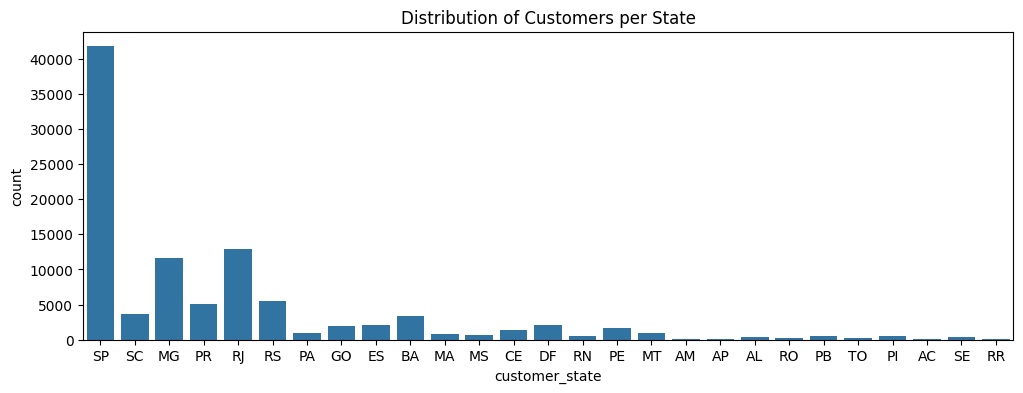

In [86]:
#Plot the distribution of customer states
plt.figure(figsize=(12,4))
sns.countplot(x='customer_state', data=customer_data)
plt.title('Distribution of Customers per State')
plt.show()

As we can se most of the customers are located in the State of Sao Paulo

<ipython-input-87-64ac413fb1f6>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sns.countplot(x='customer_city', data=customer_data, order=pd.value_counts(customer_data['customer_city']).iloc[:10].index)


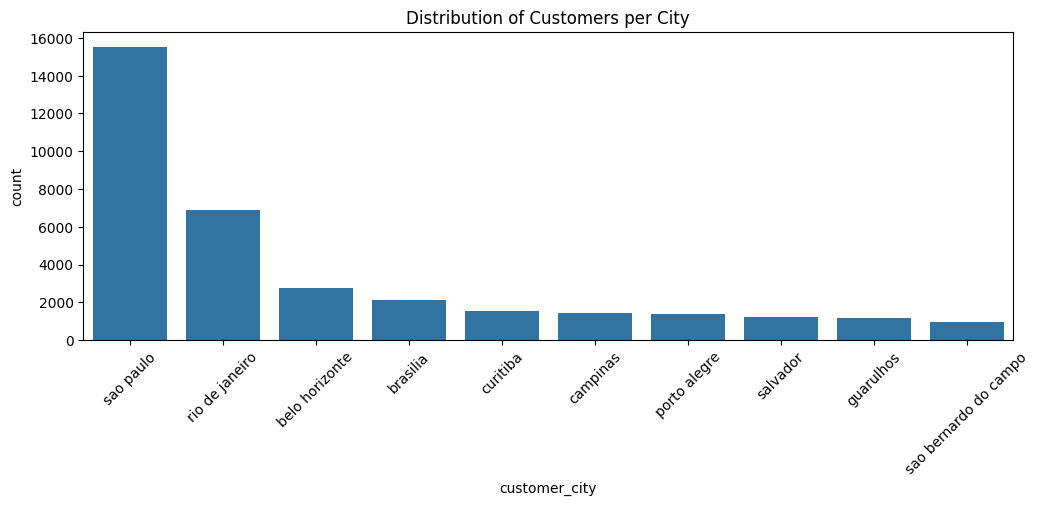

In [87]:
#Plot the distribution of customer cities
plt.figure(figsize=(12,4))
sns.countplot(x='customer_city', data=customer_data, order=pd.value_counts(customer_data['customer_city']).iloc[:10].index)
plt.title('Distribution of Customers per City')
plt.xticks(rotation=45)
plt.show()

The city withe the most customer is Sao Paulo. We expected this as it is the same as the States plot.

<Figure size 1200x400 with 0 Axes>

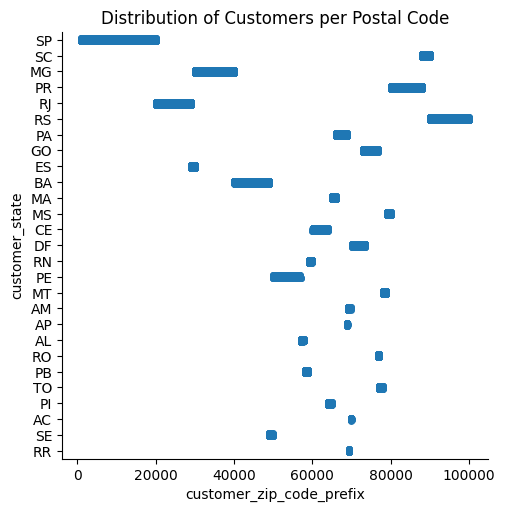

In [88]:
# ScatPlot the distribution of customer postal codes
plt.figure(figsize=(12,4))
sns.catplot(x='customer_zip_code_prefix', y='customer_state', data=customer_data)
plt.title('Distribution of Customers per Postal Code')
plt.show()

With this scat plot we can see which state has more postal codes, which makes sense to be SP as it is the city with most customers.

## __2. Order dataset__##

In [89]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Is better to change all dates to date time.

In [90]:
order_data['order_purchase_timestamp'] = pd.to_datetime(order_data['order_purchase_timestamp'])
order_data['order_approved_at'] = pd.to_datetime(order_data['order_approved_at'])
order_data['order_delivered_carrier_date'] = pd.to_datetime(order_data['order_delivered_carrier_date'])
order_data['order_delivered_customer_date'] = pd.to_datetime(order_data['order_delivered_customer_date'])
order_data['order_estimated_delivery_date'] = pd.to_datetime(order_data['order_estimated_delivery_date'])
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [91]:
order_data.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99281,97658,96476,99441
mean,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [92]:
order_data.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Since there is some missing data, lets chekc how much with percentage so it's easier to understand.

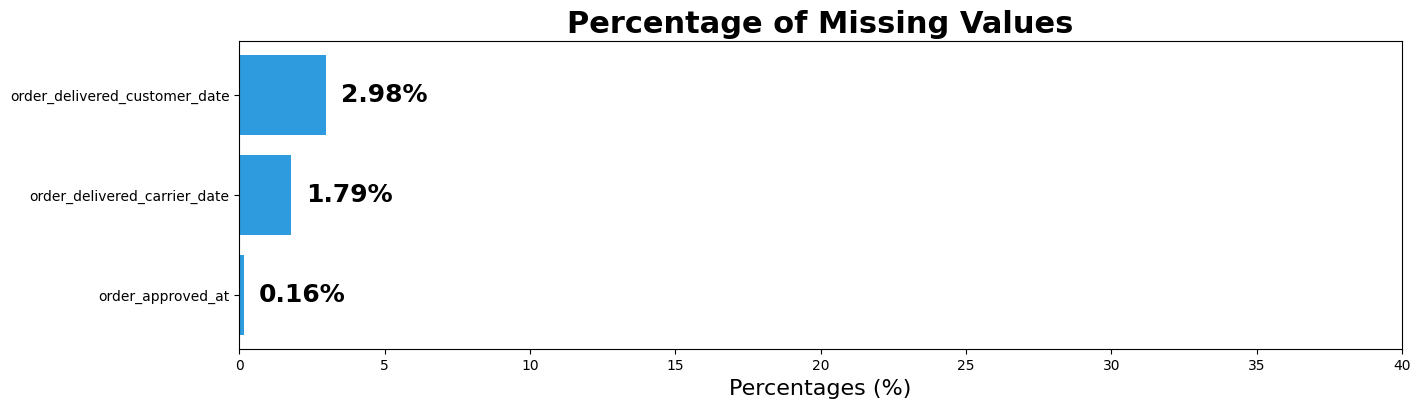

In [93]:
# Calculating the percentage of missing values for each column
missing_data = order_data.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / order_data.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#2e9bde')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

Here we find many null values in some columns. Let's chek whhy is that and if its correct or not.

The colyumns with missing values reffer to date of the delivery process. So it may have something to do with the status of each order. Let's check withy some plots.


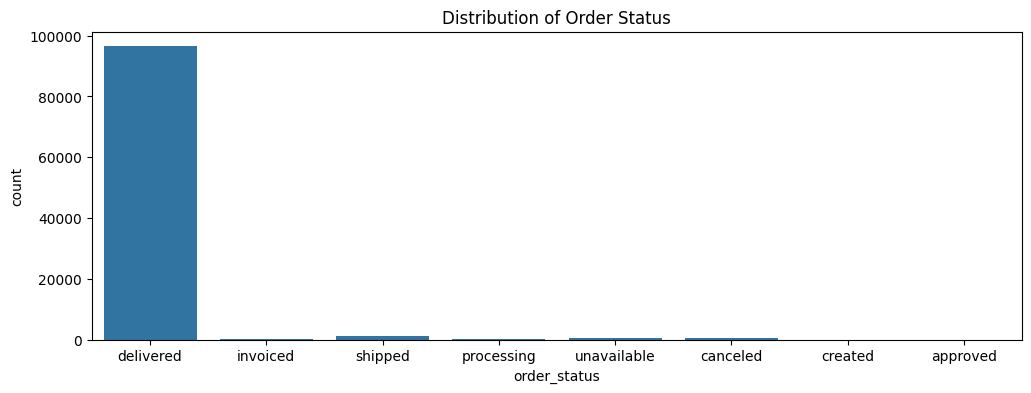

In [94]:
#Plot order status distribution, include null values
plt.figure(figsize=(12,4))
sns.countplot(x='order_status', data=order_data)
plt.title('Distribution of Order Status')
plt.show()

In [95]:
order_data[order_data['order_approved_at'].isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


We can se how every time theres been a cancel the rest of columns regarding the times of the delivery are null. Which makes sense. Still, since there is more missing date in 'order_delivered_carrier_date' and 'order_delivered_customer_date'

In [96]:
#Show the null values of order_delivered_carrier_date without the null values of order_delivered_customer_date
order_data[order_data['order_delivered_carrier_date'].isnull()].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09


Since there is many possible status lest plot their frequency.

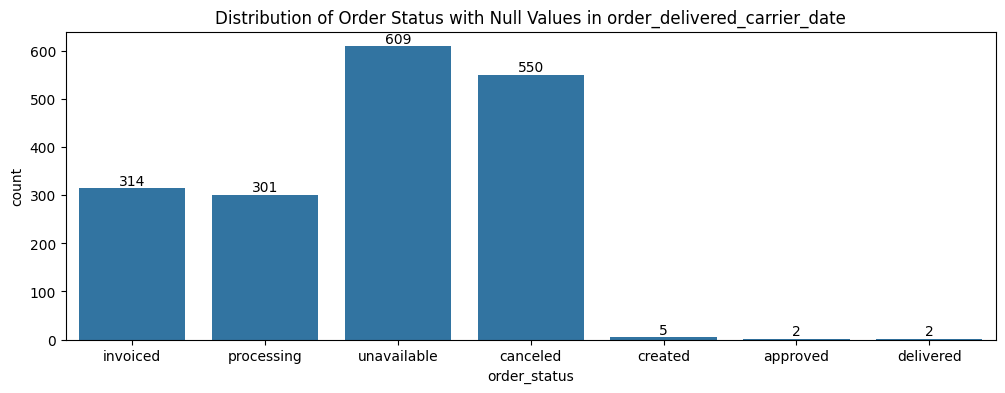

In [97]:
#Plot the frequency of the diferent status based on the null values of order_delivered_carrier_date & the count in each bar
plt.figure(figsize=(12, 4))
ax = sns.countplot(x='order_status', data=order_data[order_data['order_delivered_carrier_date'].isnull()])
ax.bar_label(ax.containers[0])
plt.title('Distribution of Order Status with Null Values in order_delivered_carrier_date')
plt.show()

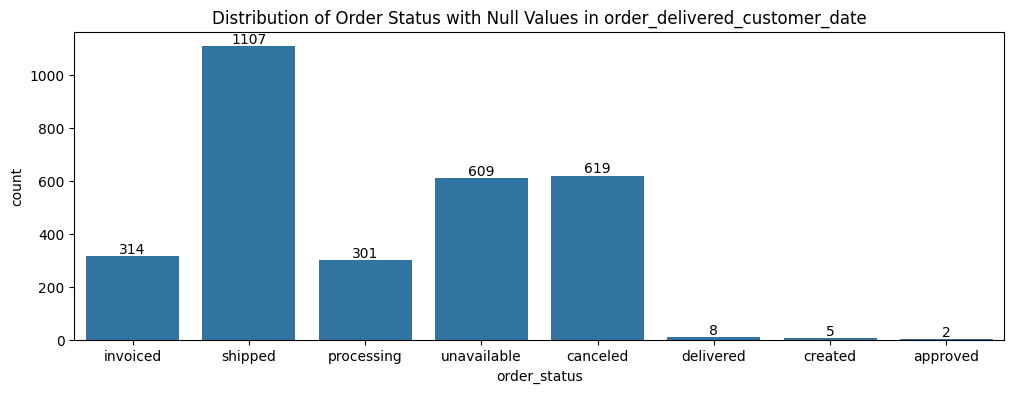

In [98]:
#Plot the frequency of the diferent status based on the null values of order_delivered_customer_date & the count in each bar
plt.figure(figsize=(12, 4))
ax = sns.countplot(x='order_status', data=order_data[order_data['order_delivered_customer_date'].isnull()])
ax.bar_label(ax.containers[0])
plt.title('Distribution of Order Status with Null Values in order_delivered_customer_date')
plt.show()

What we can check with theese Null values is how the process is going an where the packaege of the order is. So we can use this information in the future for various.

Now since we know this date and tie infrmation can be very relevant lets see if it's all in the correct format. Since its in object format it will be better to have it in datetime format.

In [99]:
order_data['order_purchase_timestamp'] = pd.to_datetime(order_data['order_purchase_timestamp'])
order_data['order_approved_at'] = pd.to_datetime(order_data['order_approved_at'])
order_data['order_delivered_carrier_date'] = pd.to_datetime(order_data['order_delivered_carrier_date'])
order_data['order_delivered_customer_date'] = pd.to_datetime(order_data['order_delivered_customer_date'])
order_data['order_estimated_delivery_date'] = pd.to_datetime(order_data['order_estimated_delivery_date'])
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


No we can look for different plots that give as more usefull information.

With the next plot we can se a __distribution of when the purchases have been made.__

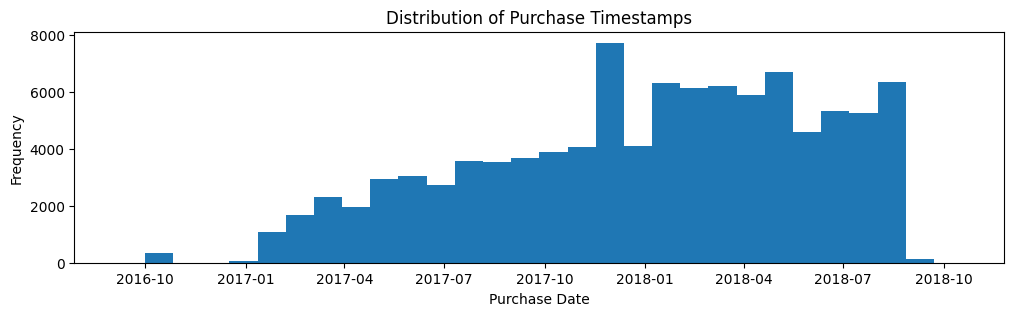

In [100]:
plt.figure(figsize=(12, 3))
order_data['order_purchase_timestamp'].hist(bins=30)
plt.title('Distribution of Purchase Timestamps')
plt.xlabel('Purchase Date')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

This next plot shows us the amount of prodcuts sold by day. This can be very helpful to analyse caimpings in specific time frames and special days and seasons such as Christmas or Black Friday.

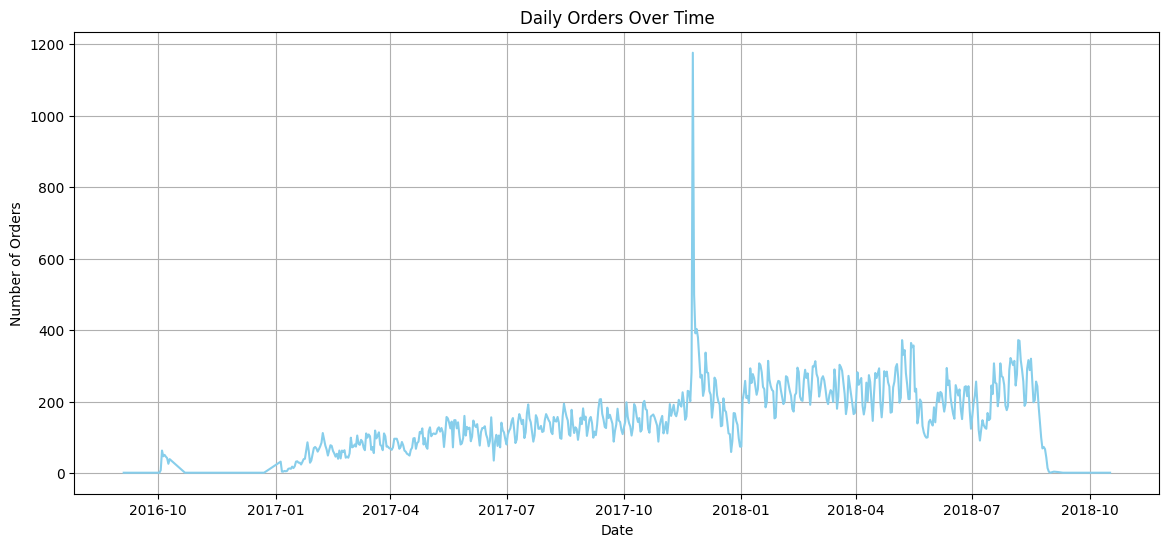

In [101]:
# Making sure date time format
order_data['order_purchase_timestamp'] = pd.to_datetime(order_data['order_purchase_timestamp'])

# Group by date
daily_orders = order_data.groupby(order_data['order_purchase_timestamp'].dt.date).size()

# Plot time series
plt.figure(figsize=(14, 6))
daily_orders.plot(color='skyblue')
plt.title('Daily Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

We can also check how the delivery times have been. To measure if there is any incidence.

<ipython-input-102-79410d94ee57>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(order_data['delivery_time'].dropna(), bins=100, palette='crest', kde=True)


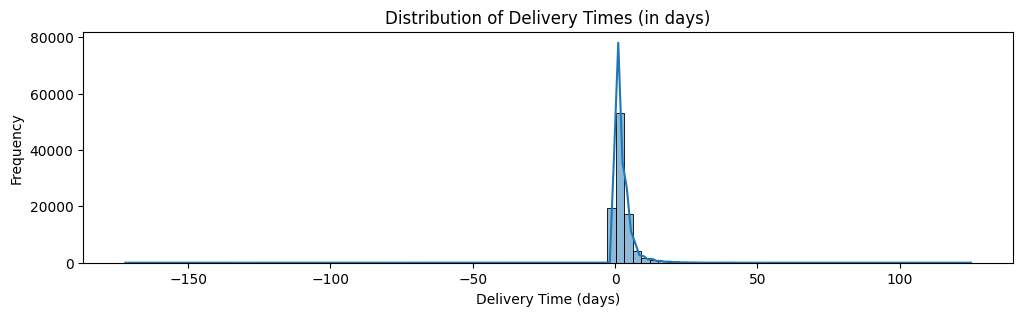

In [102]:
# Time diference calculation
order_data['delivery_time'] = order_data['order_delivered_carrier_date'] - order_data['order_purchase_timestamp']
order_data['delivery_time'] = order_data['delivery_time'].dt.days

# Plot the distribution of delivery times
plt.figure(figsize=(12, 3))
sns.histplot(order_data['delivery_time'].dropna(), bins=100, palette='crest', kde=True)
plt.title('Distribution of Delivery Times (in days)')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Frequency')
plt.show()


Another intersting plot is the number of orders by day of the week. We can see how most of the sales are in Mondays and they decrease during the week unitle sunday were the get back up a bit.



<ipython-input-103-cf55e08b30bb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='purchase_day_of_week', data=order_data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='crest')


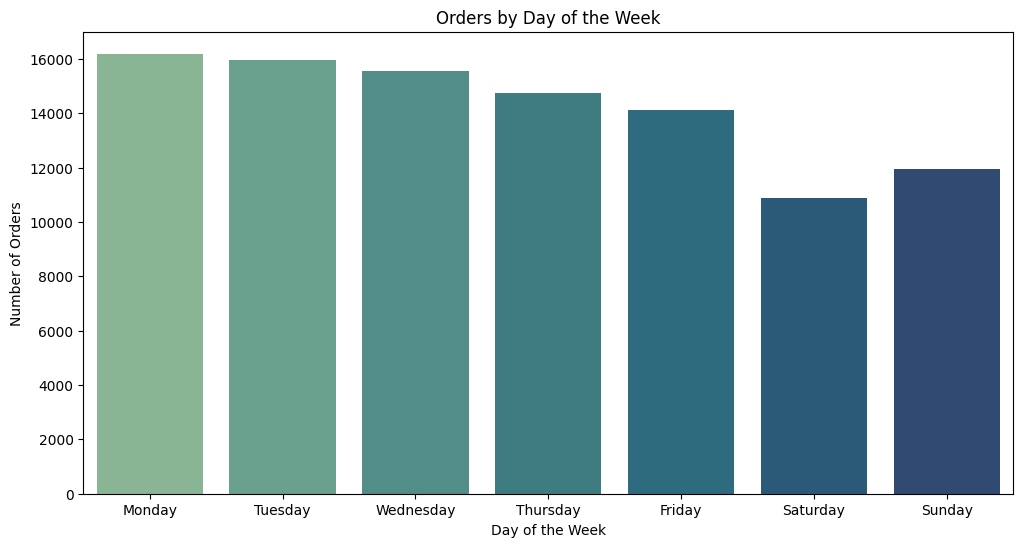

In [103]:
# Obtener el día de la semana
order_data['purchase_day_of_week'] = order_data['order_purchase_timestamp'].dt.day_name()

# Conteo por día de la semana
plt.figure(figsize=(12, 6))
sns.countplot(x='purchase_day_of_week', data=order_data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='crest')
plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

If we combine this with last plot with times of the day we can get a heatmap where it's posible to check at what times of the day there is more sales.

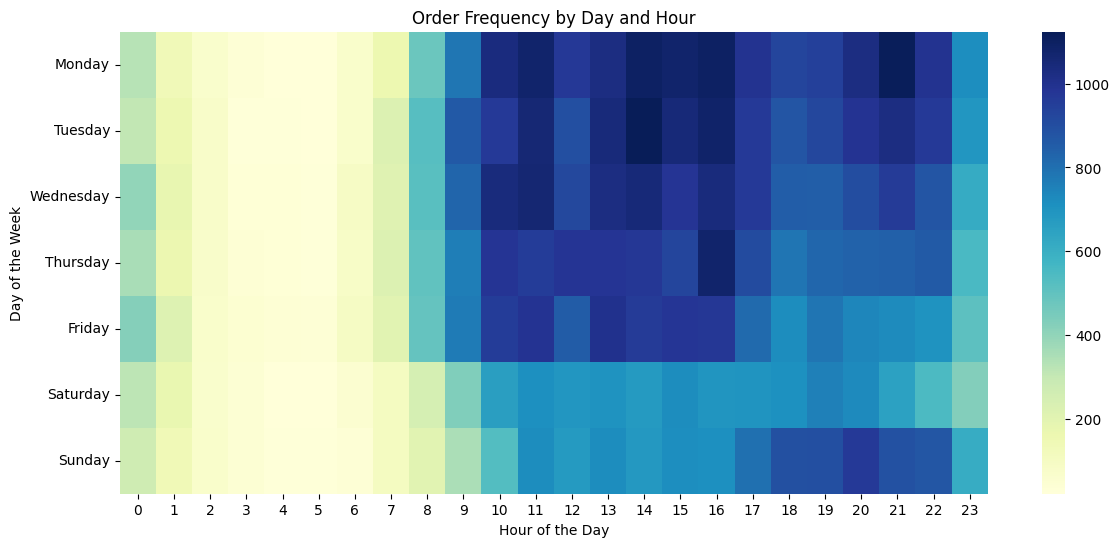

In [104]:
# Obtain the hour of the day
order_data['purchase_hour'] = order_data['order_purchase_timestamp'].dt.hour

# Count by hour of the day
heatmap_data = order_data.pivot_table(index='purchase_day_of_week', columns='purchase_hour', aggfunc='size', fill_value=0)

# Reorder days of the week
heatmap_data = heatmap_data.reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Order Frequency by Day and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

In this last plot we ca appreciate how customers prefer to buy in the morinings during the week days and then in the weekend is mores distributed along the day with a peak in the sunday evening.

This plots are very intersting because we can cross them with customer information as wel as with items and product infomration which can be key for desinging campains for specific clients at specifc seasons, monhs, days and times.

## __3. Reviews dataset__##

In [105]:
order_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41743 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [106]:
order_reviews_data.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,100000,100000,100000.000000,11715,41743,100000,100000
unique,99173,99441,NaN,4588,36046,637,89500
top,e44840754f12fad2b8646712121b349a,df56136b8031ecd28e200bb18e6ddb2e,NaN,Recomendo,Good,19/12/2017 00:00,12/08/2017 14:35
freq,3,3,NaN,426,375,466,6
mean,NaN,NaN,4.070890,NaN,NaN,NaN,NaN
std,NaN,NaN,1.359663,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [107]:
order_reviews_data.isnull().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,88285
review_comment_message,58257
review_creation_date,0
review_answer_timestamp,0


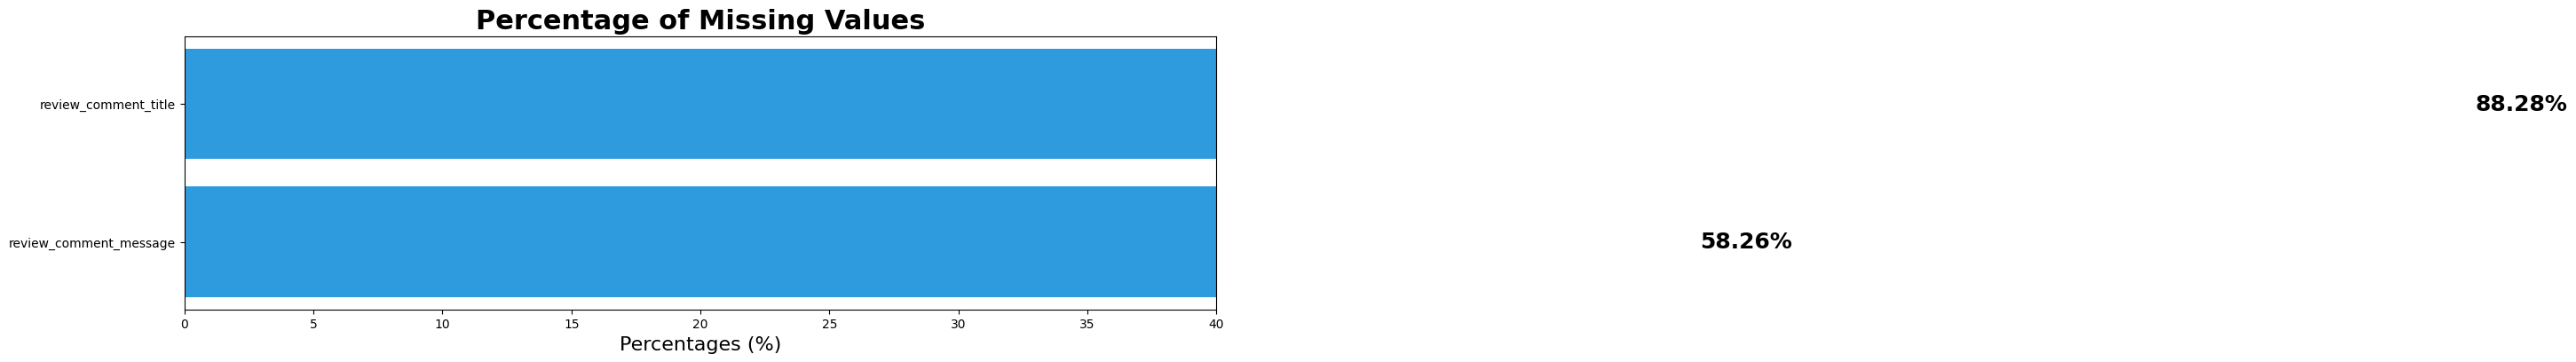

In [108]:
# Calculating the percentage of missing values for each column
missing_data = order_reviews_data.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / order_reviews_data.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#2e9bde')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

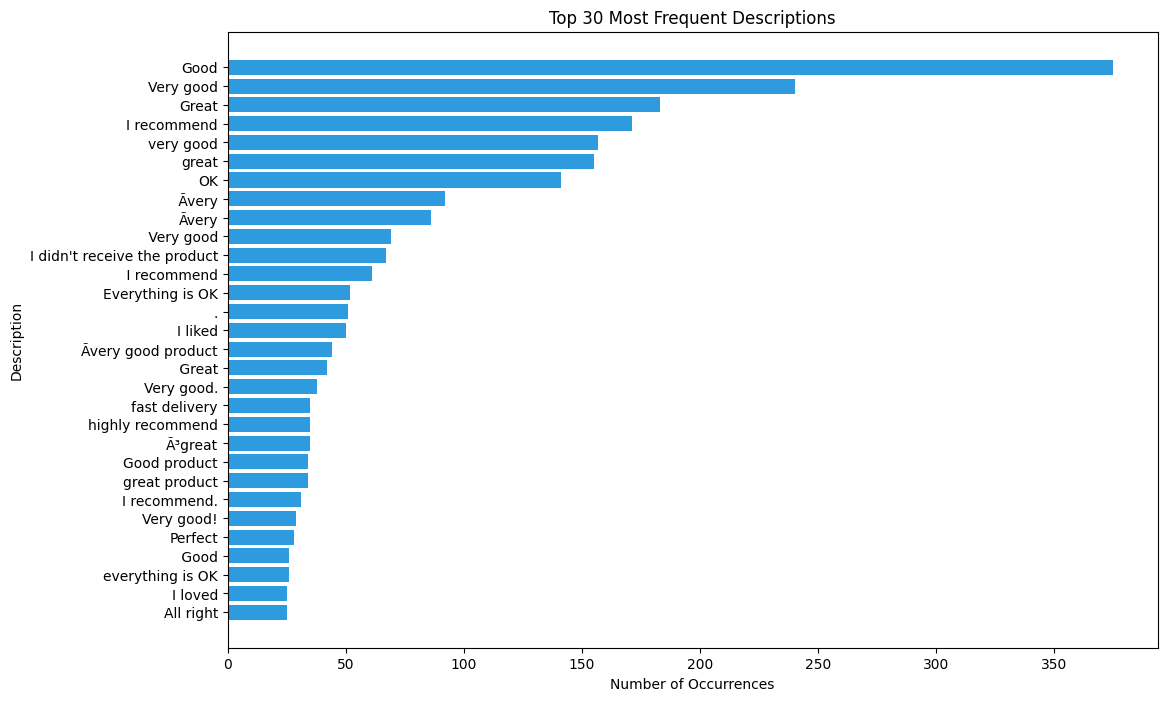

In [109]:
# Calculate the occurrence of each unique comments and sort them
comments_counts = order_reviews_data['review_comment_message'].value_counts()

# Get the top 30 comments
top_30_comments = comments_counts[:30]

# Plotting
plt.figure(figsize=(12,8))
plt.barh(top_30_comments.index[::-1], top_30_comments.values[::-1], color='#2e9bde')

# Adding labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 30 Most Frequent Descriptions')

# Show the plot
plt.show()

Most comments are simple words with clear connotation. This can help towards sentiment analysis and recomendations systems.

This data set has not many issues as is information filled by the customers. This also means its quite valuable information, especially the review score as it's a metric the can be sued in order to convince new customer to buy something.

That is why we can plot scores on products or find best and worst products in different categories.

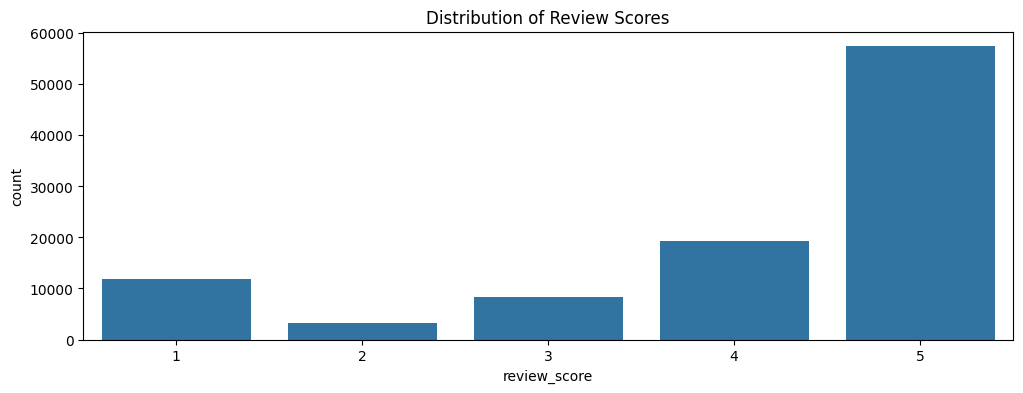

In [110]:
#Plot the distribution of review scores
plt.figure(figsize=(12,4))
sns.countplot(x='review_score', data=order_reviews_data)
plt.title('Distribution of Review Scores')
plt.show()

We can se how most of the reviews have 5 stars. Still we have to se averages on the products. And see that dsitribution to have a wide uderstanding of how is the store doing from the clients perspective. We will do thi for the 10 best items and the worst 10.

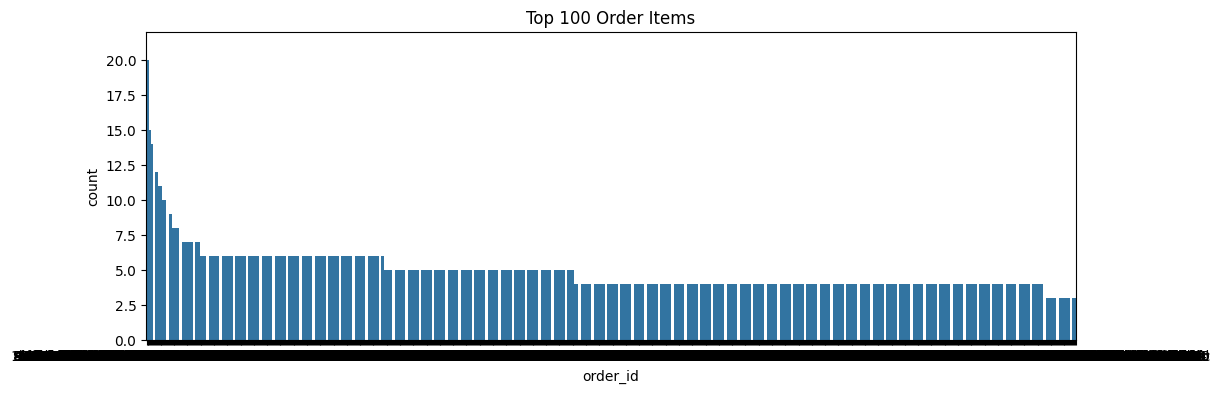

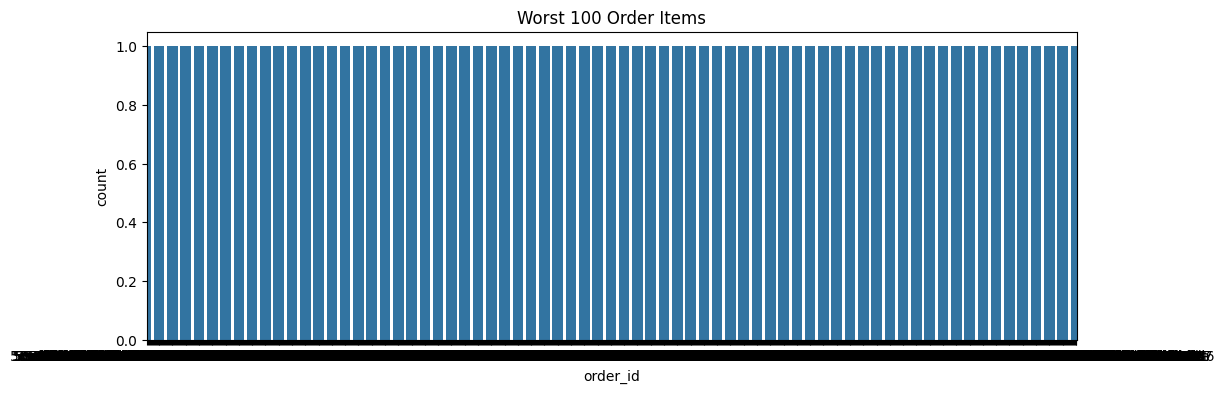

In [111]:
#Plot of the distribution of review scores per order. 10 Best
plt.figure(figsize=(12,4))
sns.countplot(x='order_id', data=order_item_data, order=order_item_data['order_id'].value_counts().iloc[:1000].index)
plt.title('Top 100 Order Items')
plt.show()

#Plot of the distribution of review scores per order. 10 Worst
plt.figure(figsize=(12,4))
sns.countplot(x='order_id', data=order_item_data, order=order_item_data['order_id'].value_counts().iloc[-1000:].index)
plt.title('Worst 100 Order Items')
plt.show()

We can see how the top 1000 items have been reviewed more than 5 times whereas the worst items just have one review.

## __4. Order payments__##

In [112]:
order_payments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [113]:
order_payments_data.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [114]:
order_payments_data.isnull().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


No null values, so no further investigation on that.

In [115]:
order_payments_data['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

<ipython-input-116-d74e7ff7afa6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='payment_type', data=order_payments_data, palette='crest')


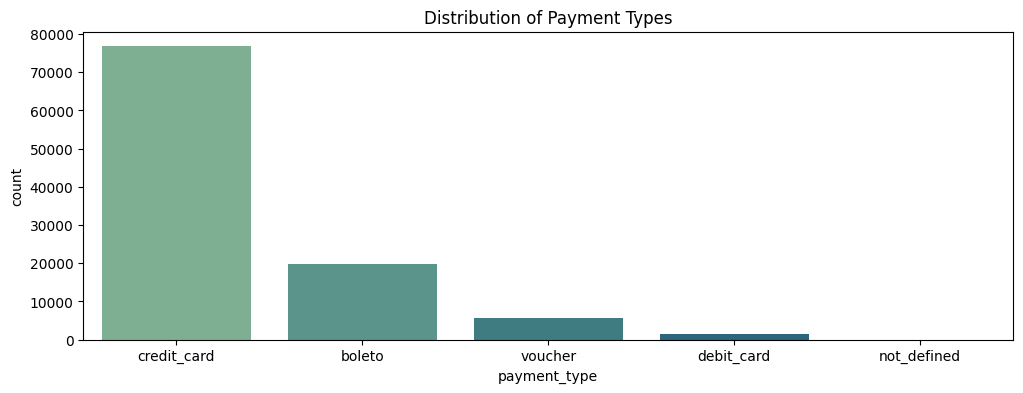

In [116]:
#Plot the distribution of payment types
plt.figure(figsize=(12,4))
sns.countplot(x='payment_type', data=order_payments_data, palette='crest')
plt.title('Distribution of Payment Types')
plt.show()

<ipython-input-117-e8ad025e3d63>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(order_payments_data['payment_value'], bins=100, palette='crest', kde=True)


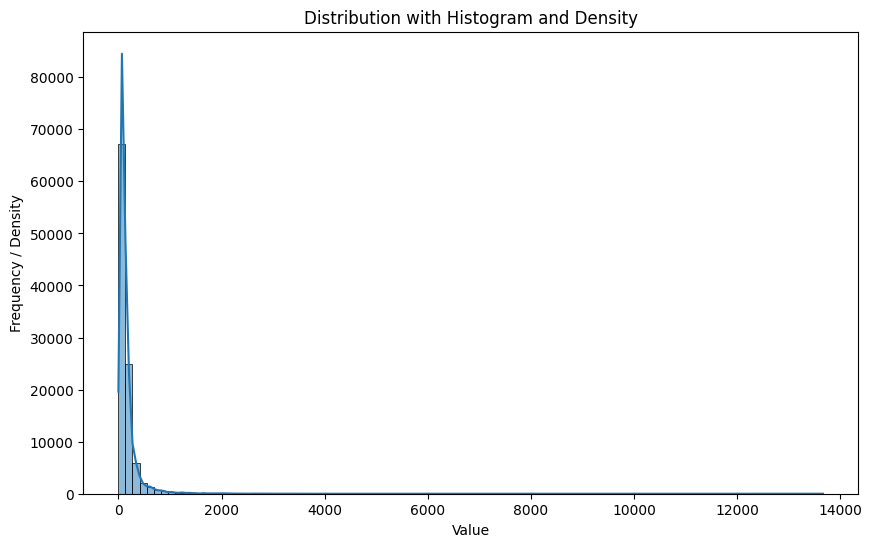

In [117]:
#Line Plot distribution of payment values
plt.figure(figsize=(10, 6))
sns.histplot(order_payments_data['payment_value'], bins=100, palette='crest', kde=True)
plt.title('Distribution with Histogram and Density')
plt.xlabel('Value')
plt.ylabel('Frequency / Density')
plt.show()

<ipython-input-118-ef75a43801d0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='payment_installments', data=order_payments_data, palette='crest')


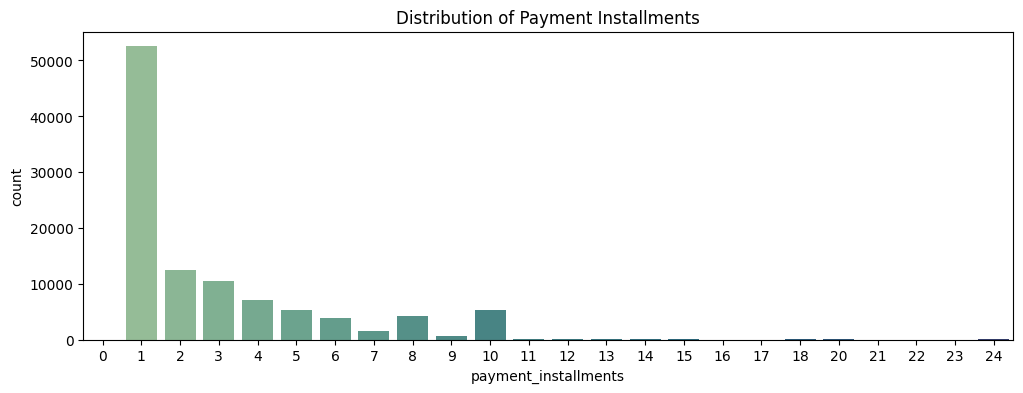

In [118]:
#Plot distribution of payment installments
plt.figure(figsize=(12,4))
sns.countplot(x='payment_installments', data=order_payments_data, palette='crest')
plt.title('Distribution of Payment Installments')
plt.show()

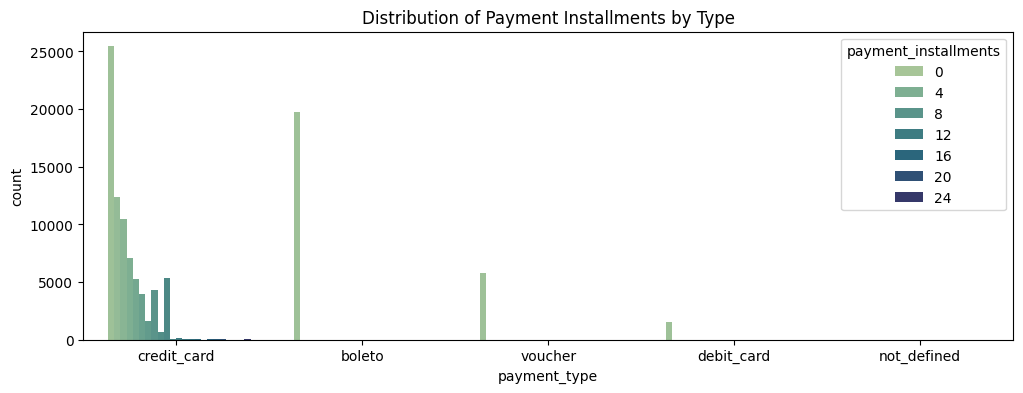

In [119]:
#Plot crossing payment type and payment installments
plt.figure(figsize=(12,4))
sns.countplot(x='payment_type', hue='payment_installments', data=order_payments_data, palette='crest')
plt.title('Distribution of Payment Installments by Type')
plt.show()

<ipython-input-120-e2e70fe385cd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(y='payment_value', x='payment_type', data=order_payments_data, palette='crest')


<Figure size 1200x400 with 0 Axes>

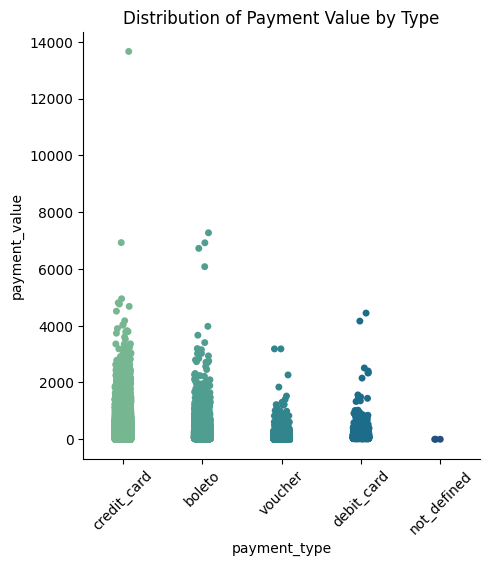

In [120]:
#scat Plot crossing payment type and payment value
plt.figure(figsize=(12,4))
sns.catplot(y='payment_value', x='payment_type', data=order_payments_data, palette='crest')
plt.title('Distribution of Payment Value by Type')
plt.xticks(rotation=45)
plt.show()

We can apreciate how there is a tendency of paying more expensive things with card over other kinds of ways.Let's do a bar plot with avg to confirm it.

<ipython-input-121-d1cb20e098e7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_type', y='payment_value', data=order_payments_data, palette='crest')


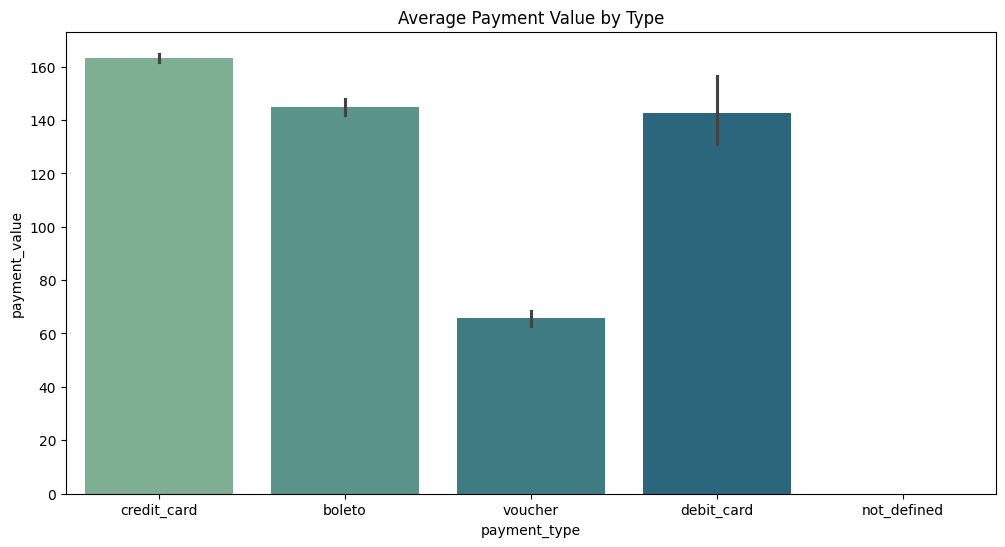

In [121]:
#Plot avg payment value by type
plt.figure(figsize=(12,6))
sns.barplot(x='payment_type', y='payment_value', data=order_payments_data, palette='crest')
plt.title('Average Payment Value by Type')
plt.show()

As we suspected the avg credit car payment is higher than the rest of them. Another interesting thing is that debit car is used as much as cash for paying.

In [122]:
#count not defined values
order_payments_data[order_payments_data['payment_type'] == 'not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


## __5. Order items__##

In [123]:
order_item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


order_item_id is an 'int64' type and it is better to have it as object as it doesn't reflect a measurement of anything is just and id.

In [124]:
order_item_data['order_item_id'] = order_item_data['order_item_id'].astype(object)

In [125]:
order_item_data.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.0,112650,112650,112650,112650.000000,112650.000000
unique,98666,21.0,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,1.0,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,98666.0,527,2033,21,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,120.653739,19.990320
std,NaN,NaN,NaN,NaN,NaN,183.633928,15.806405
min,NaN,NaN,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,NaN,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,NaN,NaN,NaN,NaN,134.900000,21.150000


In [126]:
order_item_data.isnull().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


No missing values, good.

<ipython-input-127-8893f5b600e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price', data=order_item_data, palette='crest')


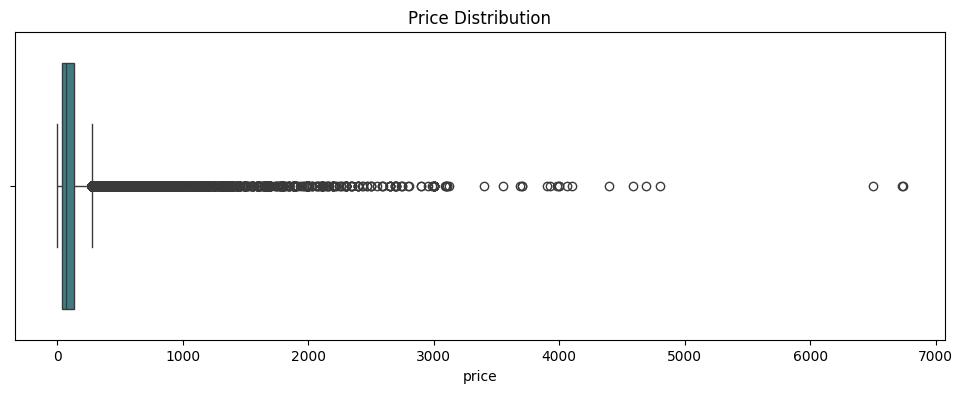

In [127]:
#Box plot the prices
plt.figure(figsize=(12,4))
sns.boxplot(x='price', data=order_item_data, palette='crest')
plt.title('Price Distribution')
plt.show()

<ipython-input-128-7edb7a669e07>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(order_item_data['price'], bins=100, palette='crest', kde=True)
<ipython-input-128-7edb7a669e07>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(order_item_data['freight_value'], bins=100, palette='crest', kde=True)


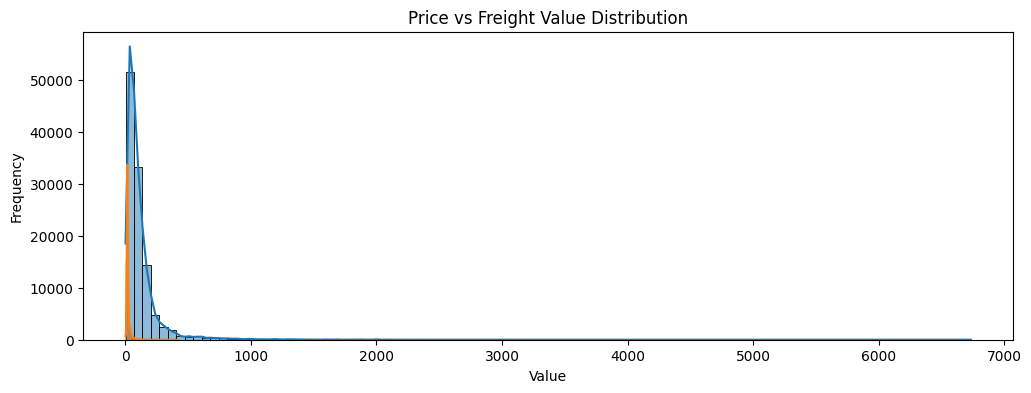

In [128]:
#Comapre the price distribution with the freight value
plt.figure(figsize=(12,4))
sns.histplot(order_item_data['price'], bins=100, palette='crest', kde=True)
sns.histplot(order_item_data['freight_value'], bins=100, palette='crest', kde=True)
plt.title('Price vs Freight Value Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [129]:
order_item_data['shipping_limit_date'] = pd.to_datetime(order_item_data['shipping_limit_date'])
order_item_data['shipping_limit_date'].head()

,shipping_limit_date
0,2017-09-19 09:45:35
1,2017-05-03 11:05:13
2,2018-01-18 14:48:30
3,2018-08-15 10:10:18
4,2017-02-13 13:57:51


<ipython-input-130-b853b7f81558>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(order_item_data['shipping_limit_date'], bins=100, palette='crest', kde=True)


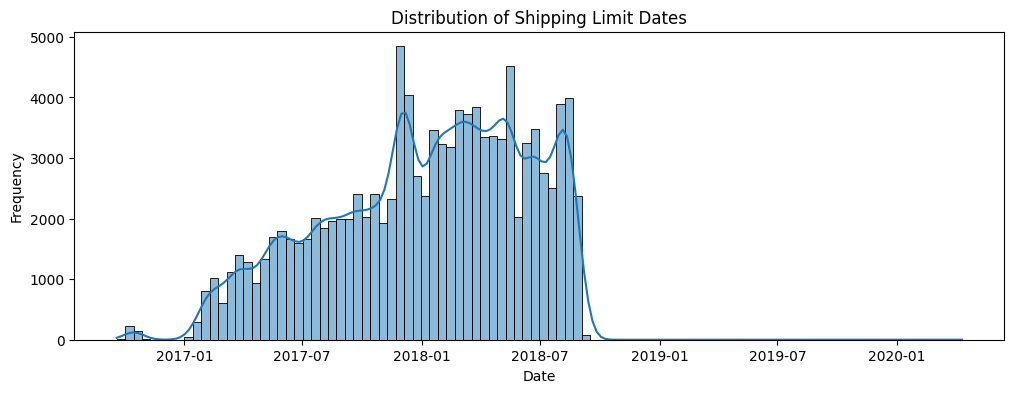

In [130]:
#Plot the distribution of shipping limit dates
plt.figure(figsize=(12,4))
sns.histplot(order_item_data['shipping_limit_date'], bins=100, palette='crest', kde=True)
plt.title('Distribution of Shipping Limit Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

## __6. Products__ ##

In [131]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [132]:
product_data.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [133]:
product_data['product_category_name'].unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', nan,
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
   

<ipython-input-134-584444d429b0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='product_category_name', data=product_data, order=product_data['product_category_name'].value_counts().index, palette='crest')


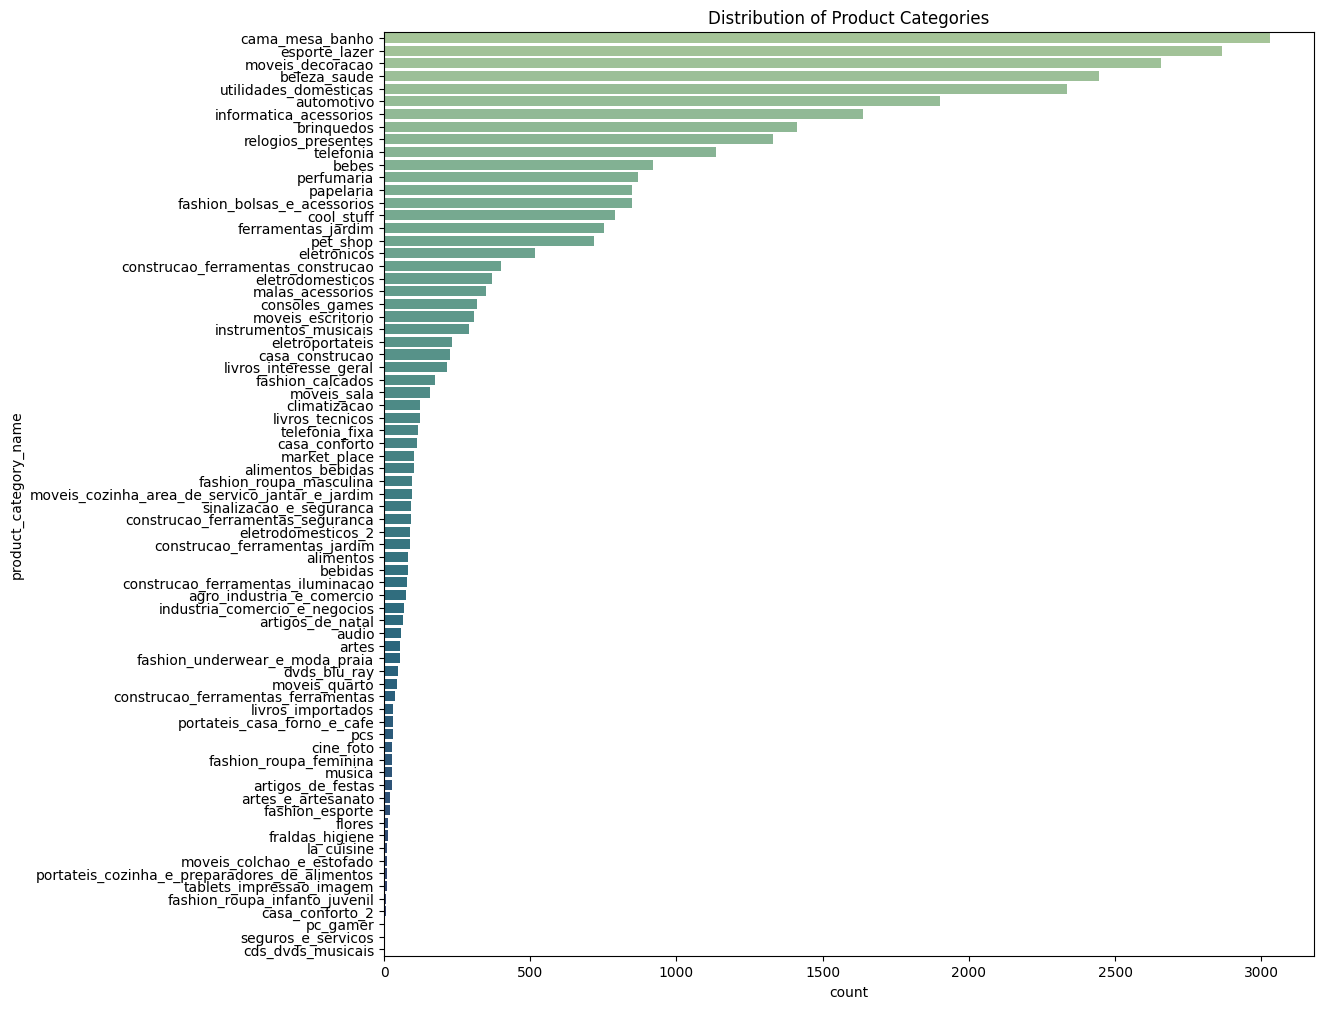

In [134]:
#Plot the distribution of product categories
plt.figure(figsize=(12,12))
sns.countplot(y='product_category_name', data=product_data, order=product_data['product_category_name'].value_counts().index, palette='crest')
plt.title('Distribution of Product Categories')
plt.show()

<ipython-input-135-5c051de14ab2>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(product_data['product_weight_g'], bins=100, palette='crest', kde=True)


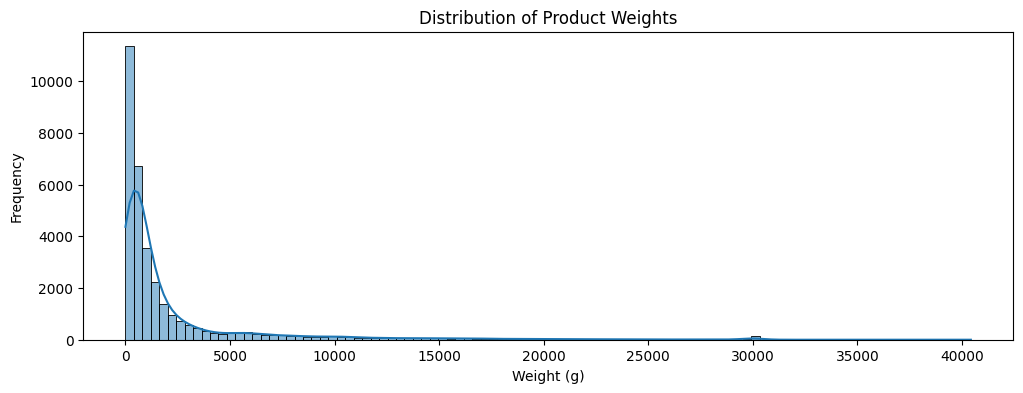

In [135]:
#Plot the distribution of product weights
plt.figure(figsize=(12,4))
sns.histplot(product_data['product_weight_g'], bins=100, palette='crest', kde=True)
plt.title('Distribution of Product Weights')
plt.xlabel('Weight (g)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-136-eabfb2455dd5>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(product_data['product_length_cm'], bins=100, palette='crest', kde=True)


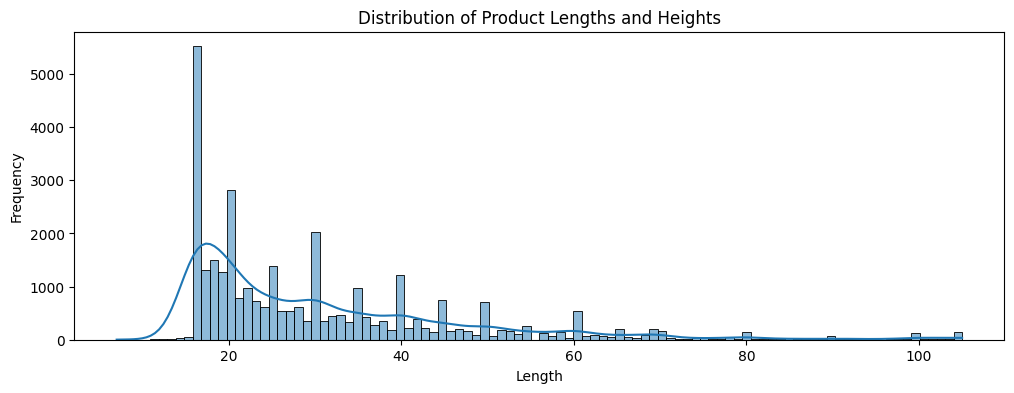

In [136]:
#Plot the distribution of product lengths
plt.figure(figsize=(12,4))
sns.histplot(product_data['product_length_cm'], bins=100, palette='crest', kde=True)
plt.title('Distribution of Product Lengths and Heights')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

<ipython-input-137-0155b49d5d32>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(product_data['product_width_cm'], bins=100, palette='crest', kde=True)


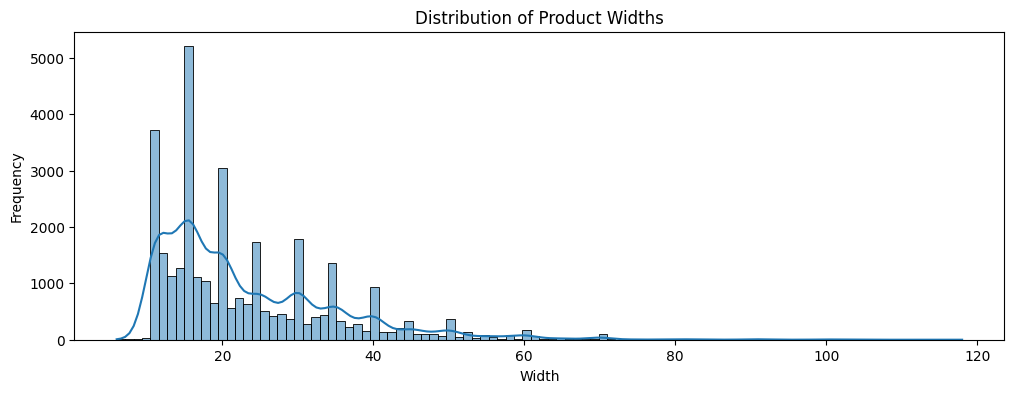

In [137]:
# Plot the distribution of product widths
plt.figure(figsize=(12, 4))
sns.histplot(product_data['product_width_cm'], bins=100, palette='crest', kde=True)
plt.title('Distribution of Product Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.show()

<ipython-input-138-f2de1409a90c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='product_weight_g', data=product_data, palette='crest')


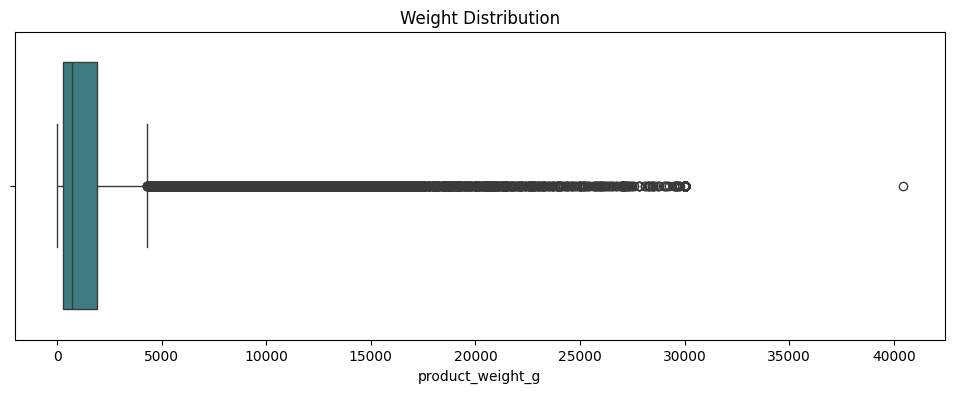

In [138]:
#bosx Plot distribution of weight
plt.figure(figsize=(12,4))
sns.boxplot(x='product_weight_g', data=product_data, palette='crest')
plt.title('Weight Distribution')
plt.show()

<ipython-input-139-d63f2dc4aca6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(product_data['product_length_cm'], bins=100, palette='crest', kde=True)
<ipython-input-139-d63f2dc4aca6>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(product_data['product_width_cm'], bins=100, palette='crest', kde=True)
<ipython-input-139-d63f2dc4aca6>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(product_data['product_height_cm'], bins=100, palette='crest', kde=True)


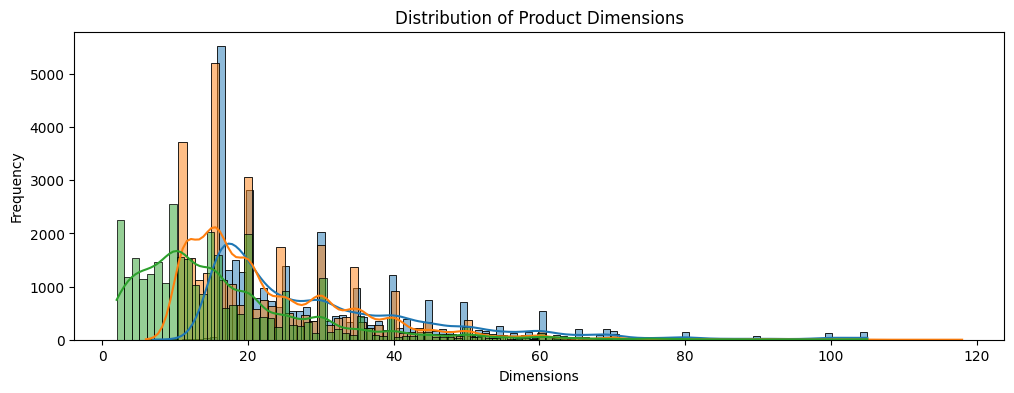

In [139]:
#Distribution of product dimensions
plt.figure(figsize=(12,4))
sns.histplot(product_data['product_length_cm'], bins=100, palette='crest', kde=True)
sns.histplot(product_data['product_width_cm'], bins=100, palette='crest', kde=True)
sns.histplot(product_data['product_height_cm'], bins=100, palette='crest', kde=True)
plt.title('Distribution of Product Dimensions')
plt.xlabel('Dimensions')
plt.ylabel('Frequency')
plt.show()

From this plot w can take that most objects have similar length and with but different height, so they are quite squared boxes.

##__7. Seller__##

In [140]:
seller_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [141]:
seller_data['seller_zip_code_prefix'] = seller_data['seller_zip_code_prefix'].astype(object)
seller_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   object
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: object(4)
memory usage: 96.8+ KB


In [142]:
seller_data.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095,3095,3095
unique,3095,2246,611,23
top,9e25199f6ef7e7c347120ff175652c3b,14940,sao paulo,SP
freq,1,49,694,1849


In [143]:
seller_data.isnull().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


No null values.

<ipython-input-144-f318b78b1aee>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='seller_state', data=seller_data, palette='crest')


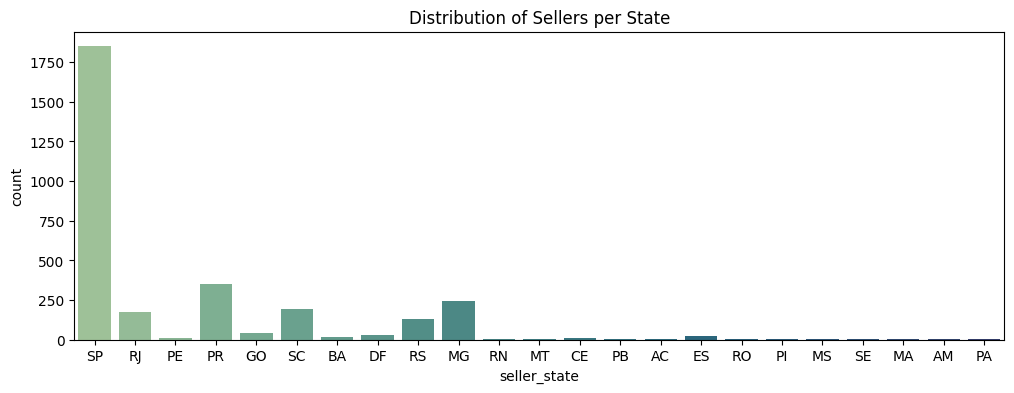

In [144]:
#Plot the distribution of seller states
plt.figure(figsize=(12,4))
sns.countplot(x='seller_state', data=seller_data, palette='crest')
plt.title('Distribution of Sellers per State')
plt.show()

<ipython-input-145-b68e489a168d>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sns.countplot(x='seller_city', data=seller_data, order=pd.value_counts(seller_data['seller_city']).iloc[:10].index, palette='crest')
<ipython-input-145-b68e489a168d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='seller_city', data=seller_data, order=pd.value_counts(seller_data['seller_city']).iloc[:10].index, palette='crest')


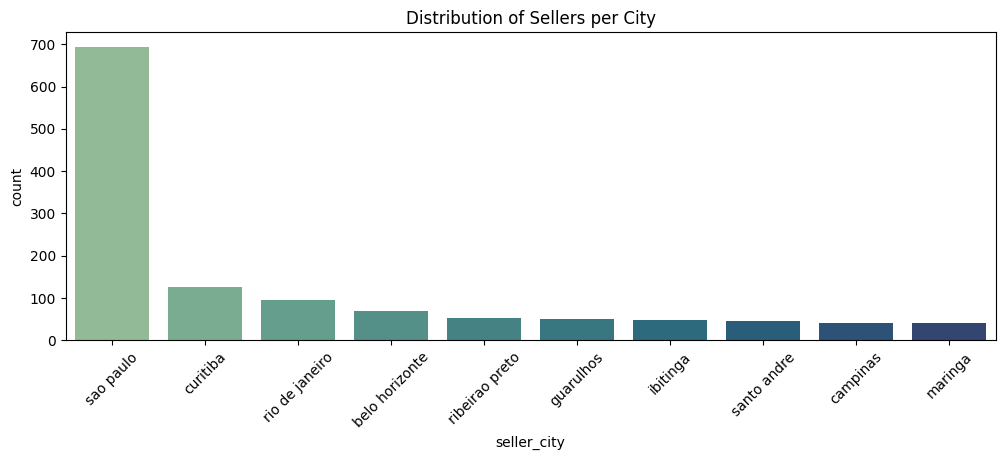

In [145]:
#Plot the distribution of seller cities, make bars same color if its the same as the state
plt.figure(figsize=(12,4))
sns.countplot(x='seller_city', data=seller_data, order=pd.value_counts(seller_data['seller_city']).iloc[:10].index, palette='crest')
plt.title('Distribution of Sellers per City')
plt.xticks(rotation=45)
plt.show()

##__8. Geolocation__##

In [146]:
geolocation_data.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [147]:
geolocation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [148]:
geolocation_data.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [149]:
geolocation_data.isnull().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


<ipython-input-150-7829d0d3c560>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='geolocation_lng', y='geolocation_lat', data=geolocation_data, palette='crest')


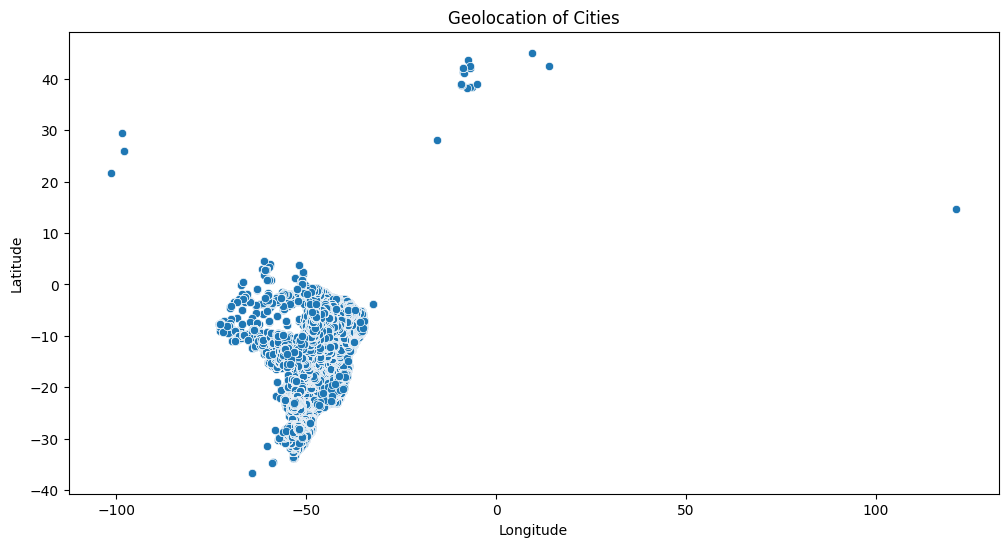

In [150]:
#Plot map of cities
plt.figure(figsize=(12,6))
sns.scatterplot(x='geolocation_lng', y='geolocation_lat', data=geolocation_data, palette='crest')
plt.title('Geolocation of Cities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

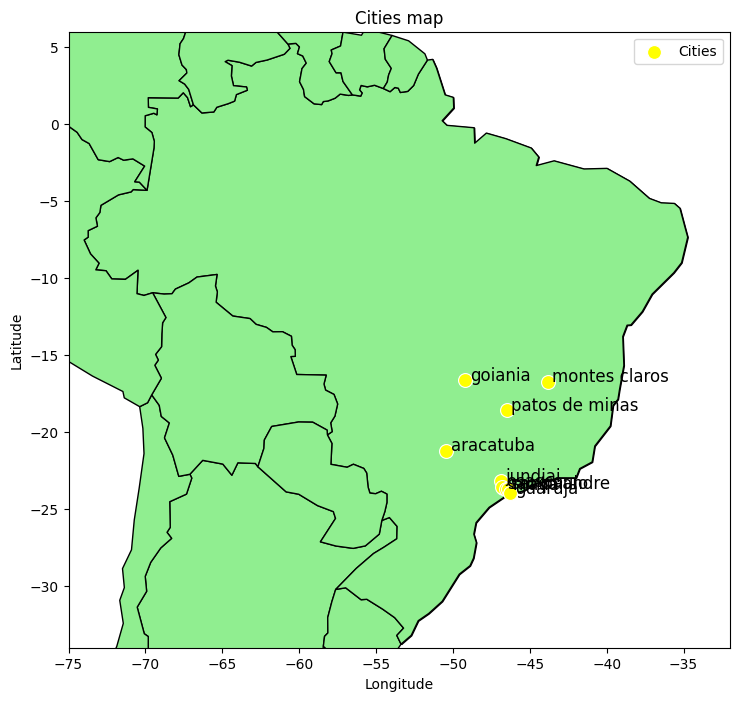

In [151]:
# URL of the shapefile
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"

# Read the shapefile
world = gpd.read_file(url)
brazil = world[world['NAME'] == 'Brazil']

# Example data: 10 random cities
data = geolocation_data.sample(10)


# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

brazil.plot(ax=ax, color='lightgrey', edgecolor='black')

# Draw the world map
world.plot(ax=ax, color='lightgreen', edgecolor='black')


# Grapgical representation of the cities
sns.scatterplot(
    x='geolocation_lng', y='geolocation_lat', data=data, ax=ax,
    color='yellow', s=100, label='Cities'
)

# Add city names to the plot
for i, row in data.iterrows():
    ax.text(row['geolocation_lng'] + 0.3, row['geolocation_lat'], row['geolocation_city'], fontsize=12)

# Customize the plot
ax.set_title('Cities map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim(-75, -32)   # Longitud
ax.set_ylim(-34, 6)     # Latitud
plt.legend(scatterpoints=1, frameon=True, labelspacing=1)
plt.show()

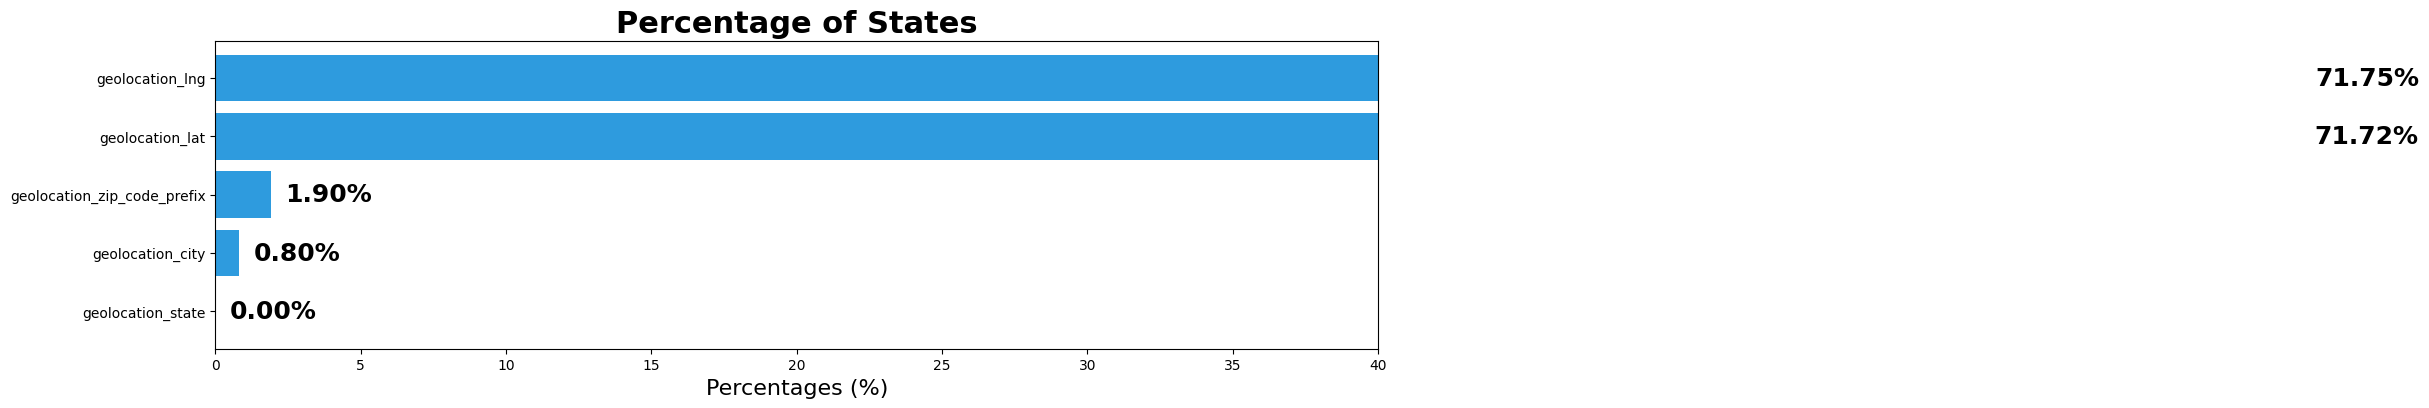

In [152]:
# Calculating the percentage of states
state_percentage = (geolocation_data.nunique() / geolocation_data.shape[0]) * 100

# Prepare values
state_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(state_percentage.index, state_percentage, color='#2e9bde')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(state_percentage, state_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of States", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

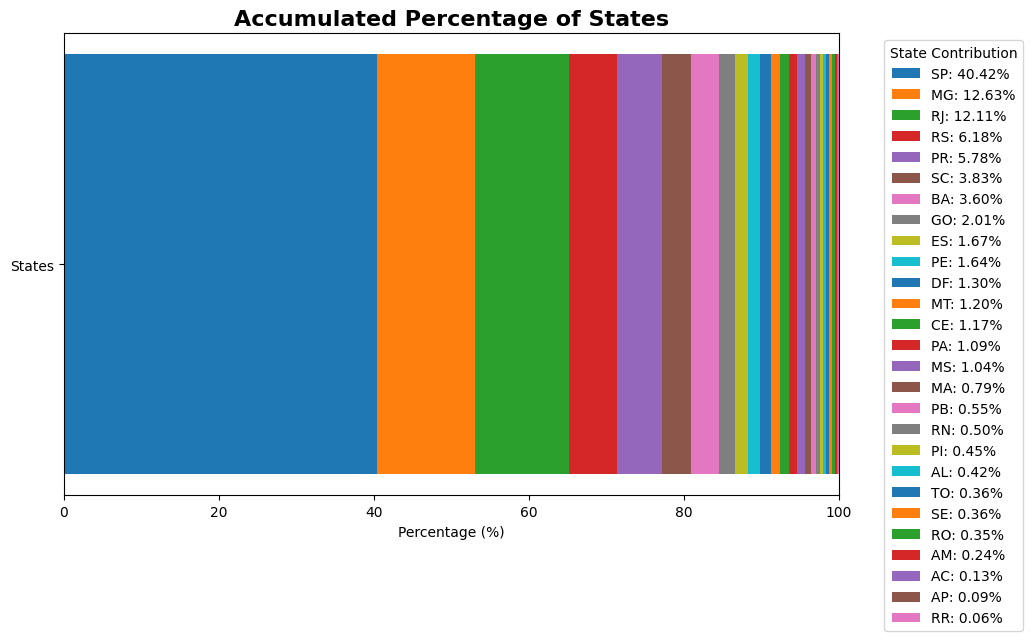

In [153]:
# Calculating the percentage of states
state_counts = geolocation_data['geolocation_state'].value_counts()
total_state_count = geolocation_data['geolocation_state'].count()
state_percentage = (state_counts / total_state_count) * 100

# Generate distinct colors for each state using a more distinct color palette
colors = sns.color_palette("tab10", len(state_percentage))

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(["States"], [100], color='lightgray')  # Background for full 100%
left = 0
for (state, percent), color in zip(state_percentage.items(), colors):
    ax.barh(["States"], [percent], left=left, color=color, label=f"{state}: {percent:.2f}%")
    left += percent

# Add legend with state names
ax.legend(title="State Contribution", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add title and labels
plt.title("Accumulated Percentage of States", fontweight='bold', fontsize=16)
plt.xlabel("Percentage (%)")
plt.xlim([0, 100])
plt.show()


## __Merge into one dataset and cleaning it__ ##

To run this customer segmentation the plan is to analyse the different groups of customer and their shopping habits. It's important to consider multiple factors that could affect this, location, money expent, category etc...

For this matter a merged data set with all the important information is created.

In [155]:
order_customer = order_data.merge(customer_data, on = 'customer_id')
order_customer.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,purchase_day_of_week,purchase_hour,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,Monday,10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,Tuesday,20,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.0,Wednesday,8,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,3.0,Saturday,19,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0.0,Tuesday,21,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [156]:
df_full = order_customer.merge(order_payments_data, on = 'order_id')
df_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,purchase_day_of_week,purchase_hour,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,Monday,10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,Monday,10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,Monday,10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,Tuesday,20,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.0,Wednesday,8,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,credit_card,3,179.12


In [157]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103886 non-null  object        
 1   customer_id                    103886 non-null  object        
 2   order_status                   103886 non-null  object        
 3   order_purchase_timestamp       103886 non-null  datetime64[ns]
 4   order_approved_at              103711 non-null  datetime64[ns]
 5   order_delivered_carrier_date   101998 non-null  datetime64[ns]
 6   order_delivered_customer_date  100754 non-null  datetime64[ns]
 7   order_estimated_delivery_date  103886 non-null  datetime64[ns]
 8   delivery_time                  101998 non-null  float64       
 9   purchase_day_of_week           103886 non-null  object        
 10  purchase_hour                  103886 non-null  int32         
 11  

In [158]:
df_full['order_status'].value_counts()

,count
order_status,
delivered,100756
shipped,1166
canceled,664
unavailable,649
invoiced,325
processing,319
created,5
approved,2


In [159]:
#Removing cancelled orders
df_full = df_full[df_full['order_status'] == 'delivered']
df_full['order_status'].value_counts()

,count
order_status,
delivered,100756


Some columns won't be needed so it's better to delete them as this will lower the cost of executing all this process.

In [160]:
column_name = df_full.columns
column_name

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delivery_time', 'purchase_day_of_week', 'purchase_hour',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [161]:
#Dropping columns
df_full = df_full.drop(['order_status','order_purchase_timestamp'], axis = 1)
df_full = df_full.drop(column_name[5:13], axis = 1)
df_full

,order_id,customer_id,order_approved_at,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,sao paulo,SP,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,barreiras,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,vianopolis,GO,1,credit_card,3,179.12
...,...,...,...,...,...,...,...,...,...
103881,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,sao jose dos campos,SP,1,credit_card,3,85.08
103882,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 13:10:37,praia grande,SP,1,credit_card,3,195.00
103883,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 15:04:16,nova vicosa,BA,1,credit_card,5,271.01
103884,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:36:21,japuiba,RJ,1,credit_card,4,441.16


In [162]:
len(df_full['customer_state'].unique())

27

This dataset is almost ready, its outliers need to be checked so the information is more reliable.

__Check Outliers:__

In [163]:
df_full['payment_value'].describe()

,payment_value
count,100756.000000
mean,153.067428
std,214.451418
min,0.000000
25%,56.780000
50%,100.000000
75%,171.290000
max,13664.080000


In [164]:
Q1 = df_full['payment_value'].quantile(0.25)
Q3 = df_full['payment_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
out_list = df_full.index[(df_full['payment_value'] < lower_bound) | (df_full['payment_value'] > upper_bound)]
out_list = sorted(set(out_list))
print('There are ' + str(len(out_list)) + ' outliers')
print('Now lets see if we need to remove it or not')

There are 7698 outliers
Now lets see if we need to remove it or not


The analysis that I'm looking for are:

- Number of monthly order (count)
- Daily order trend (count)
- Orders per payment type (count)

Considering that, the value of payment will not affect the results. The outliers will be kept for this reason. However, later on clustering analysis outliers might need to be removed

__Visualization:__

In [166]:
order_monthly = df_full[['order_approved_at']].groupby(df_full['order_approved_at'].dt.to_period('M')).agg({'order_approved_at':'count'})
order_monthly.head()

,order_approved_at
order_approved_at,
2016-10,282
2016-12,1
2017-01,763
2017-02,1735
2017-03,2708


In [167]:
#Change the column name to num_of_orders
order_monthly = order_monthly.rename(columns = {'order_approved_at': 'num_of_orders'})
#Changing order_approved_at to column, not an index
order_monthly = order_monthly.reset_index()

#adding column for month name and year
order_monthly['month_year'] = order_monthly['order_approved_at'].dt.strftime('%b-%Y')
order_monthly.head()

,order_approved_at,num_of_orders,month_year
0,2016-10,282,Oct-2016
1,2016-12,1,Dec-2016
2,2017-01,763,Jan-2017
3,2017-02,1735,Feb-2017
4,2017-03,2708,Mar-2017


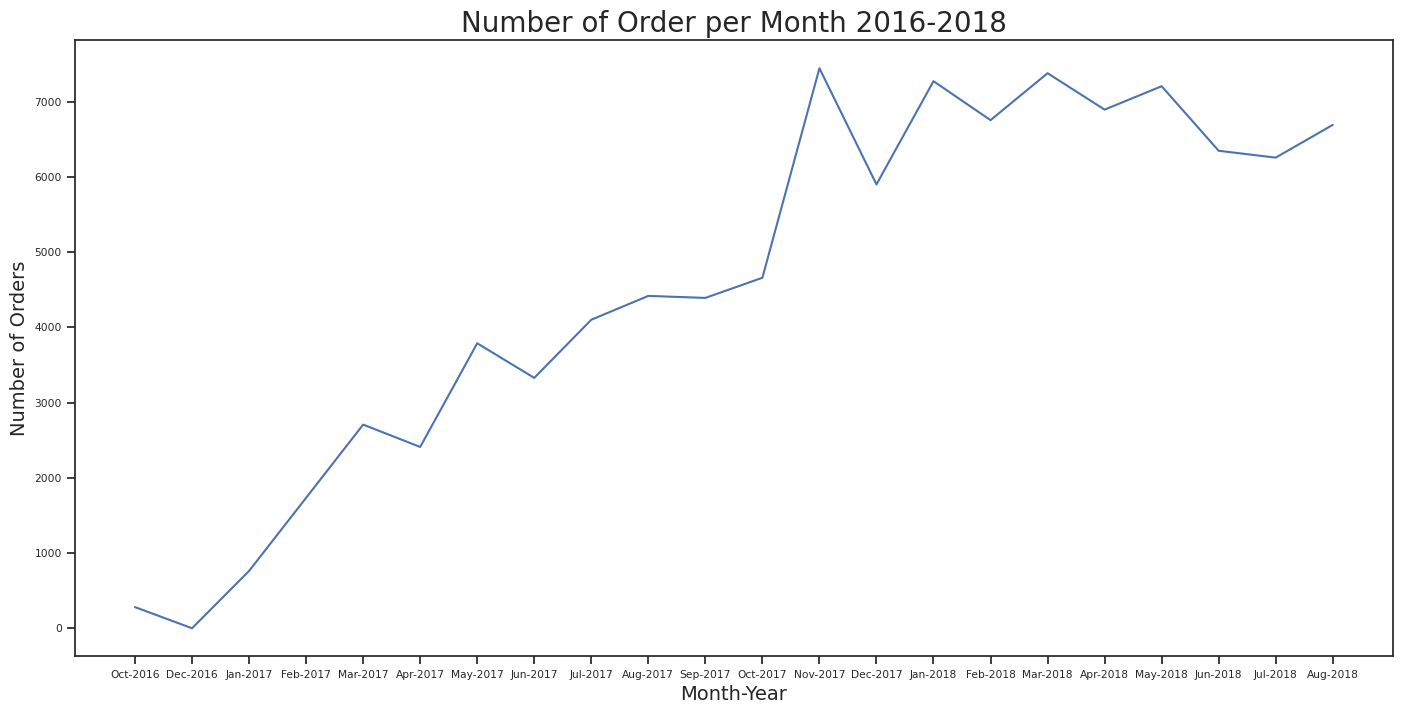

In [168]:
plt.figure(figsize=(17,8))
sns.set_theme(style="ticks", font_scale=0.7)
order_monthly_viz = sns.lineplot(x = 'month_year', y = 'num_of_orders', data = order_monthly)
order_monthly_viz.set_title('Number of Order per Month 2016-2018',fontsize = 20)
order_monthly_viz.set_xlabel('Month-Year',fontsize = 14)
order_monthly_viz.set_ylabel('Number of Orders',fontsize = 14)
plt.show()

Function to visualize monthly order per year

In [169]:
def call_monthly_order (df,year):
  df_year = df[df['order_approved_at'].dt.year == year]
  df_year = df_year[['month_year','num_of_orders']]
  sns.set(rc = {'figure.figsize':(10,4)})
  sns.set_theme(style="ticks", font_scale=0.8)
  visualize = sns.lineplot(x = 'month_year', y = 'num_of_orders', data = df_year)
  visualize.set_title('Number of Order per Month in '+ str(year), fontsize = 17)
  visualize.set_xlabel('Month',fontsize = 13)
  visualize.set_ylabel('Number of Orders', fontsize = 13)
  return visualize

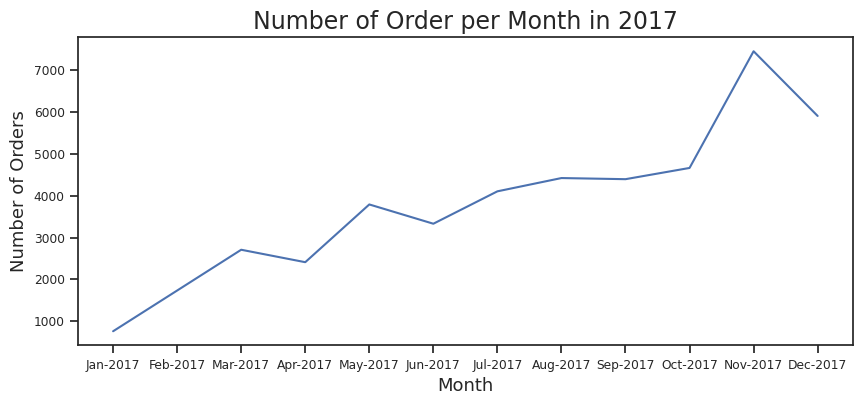

In [170]:
orders_2017 = call_monthly_order(order_monthly,2017)

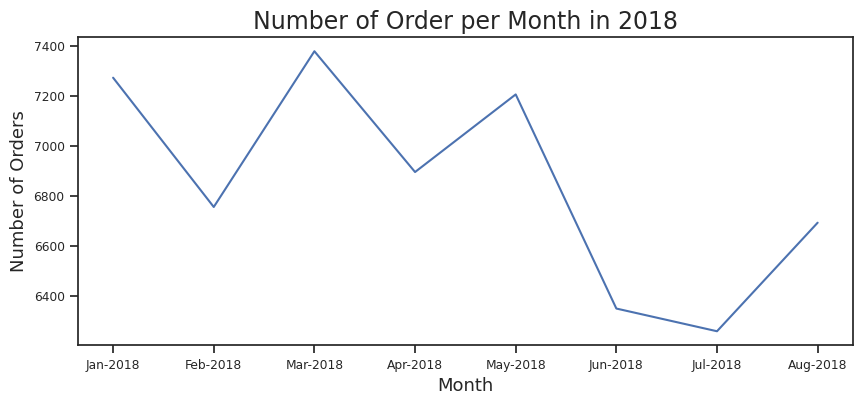

In [171]:
orders_2018 = call_monthly_order(order_monthly,2018)

## __Insights__ ##

Some insights we get from all the explanatory analysis and data cleaning above:

1. The number of sales grew significantly in 2017

2. On June 2018 the sales dropped

3. Customers makes the most order on Tuesday, while Sunday is the least favourite

4. Credit card is the most preferrable payment type, while the usage of debit card is the lowest (only 1% out of 100k+ orders)

# __Customer segmentation__ #

In [172]:
df_clean = df_full.drop(out_list, axis = 0)
df_clean.head()

,order_id,customer_id,order_approved_at,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,sao paulo,SP,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,barreiras,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,vianopolis,GO,1,credit_card,3,179.12


__Creating RFM Score__
R = Recency

Days since the last purchase

In [174]:
max_date = df_clean.groupby('customer_id')['order_approved_at'].max().reset_index()
max_date = max_date.rename({'order_approved_at':'most_recent'},axis = 1)
max_date.head()

,customer_id,most_recent
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:35:32
1,000161a058600d5901f007fab4c27140,2017-07-16 09:55:12
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:15:20
3,0002414f95344307404f0ace7a26f1d5,2017-08-17 03:10:27
4,000379cdec625522490c315e70c7a9fb,2018-04-04 03:10:19


In [175]:
max_date['r_score'] = (max_date['most_recent'].max() - max_date['most_recent']).dt.days
max_date.head()

,customer_id,most_recent,r_score
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:35:32,287.0
1,000161a058600d5901f007fab4c27140,2017-07-16 09:55:12,409.0
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:15:20,547.0
3,0002414f95344307404f0ace7a26f1d5,2017-08-17 03:10:27,377.0
4,000379cdec625522490c315e70c7a9fb,2018-04-04 03:10:19,147.0


F = Frequency

How many times the customer makes transaction

In [176]:
n_transaction = df_clean.groupby('customer_id')['order_id'].count().reset_index()
n_transaction = n_transaction.rename({'order_id':'f_score'},axis = 1)
n_transaction.head()

,customer_id,f_score
0,00012a2ce6f8dcda20d059ce98491703,1
1,000161a058600d5901f007fab4c27140,1
2,0001fd6190edaaf884bcaf3d49edf079,1
3,0002414f95344307404f0ace7a26f1d5,1
4,000379cdec625522490c315e70c7a9fb,1


M = Monetary

Average Purchase Value form the customer

In [177]:
avg_purchase = df_clean.groupby('customer_id')['payment_value'].mean().reset_index()
avg_purchase = avg_purchase.rename({'payment_value':'m_score'},axis = 1)
avg_purchase.head()

,customer_id,m_score
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01


In [178]:
avg_purchase['customer_id'].nunique()

88913

This indicates there are 88893 unique customers.

In [179]:
merge = max_date.merge(n_transaction, how = 'left', on = 'customer_id')
merge = merge.merge(avg_purchase, how = 'left', on = 'customer_id')
merge

,customer_id,most_recent,r_score,f_score,m_score
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:35:32,287.0,1,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:55:12,409.0,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:15:20,547.0,1,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-17 03:10:27,377.0,1,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-04 03:10:19,147.0,1,107.01
...,...,...,...,...,...
88908,fffcb937e9dd47a13f05ecb8290f4d3e,2018-03-17 01:35:21,165.0,1,91.91
88909,fffecc9f79fd8c764f843e9951b11341,2018-03-29 17:10:27,152.0,3,27.12
88910,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:54:37,99.0,1,63.13
88911,ffff42319e9b2d713724ae527742af25,2018-06-13 17:20:23,76.0,1,214.13


In [180]:
df_rfm = merge[['customer_id','r_score','f_score','m_score']]
df_rfm

,customer_id,r_score,f_score,m_score
0,00012a2ce6f8dcda20d059ce98491703,287.0,1,114.74
1,000161a058600d5901f007fab4c27140,409.0,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,547.0,1,195.42
3,0002414f95344307404f0ace7a26f1d5,377.0,1,179.35
4,000379cdec625522490c315e70c7a9fb,147.0,1,107.01
...,...,...,...,...
88908,fffcb937e9dd47a13f05ecb8290f4d3e,165.0,1,91.91
88909,fffecc9f79fd8c764f843e9951b11341,152.0,3,27.12
88910,fffeda5b6d849fbd39689bb92087f431,99.0,1,63.13
88911,ffff42319e9b2d713724ae527742af25,76.0,1,214.13


__Using K-Means to Cluster__

In [205]:
features = df_rfm.drop('customer_id',axis = 1)
scale = StandardScaler()
features_scaled = scale.fit_transform(features)
features_scaled

array([[ 0.31748702, -0.12194792,  0.02629561],
       [ 1.11727598, -0.12194792, -0.63561895],
       [ 2.02195531, -0.12194792,  1.15461309],
       ...,
       [-0.91497467, -0.12194792, -0.69547515],
       [-1.06575456, -0.12194792,  1.41627422],
       [ 0.80260491, -0.12194792, -0.94203238]])

In [206]:
# Handle NaN values before scaling
features = df_rfm.drop('customer_id', axis=1)
# Impute NaN values with the mean of each column
features = features.fillna(features.mean())

scale = StandardScaler()
features_scaled = scale.fit_transform(features)

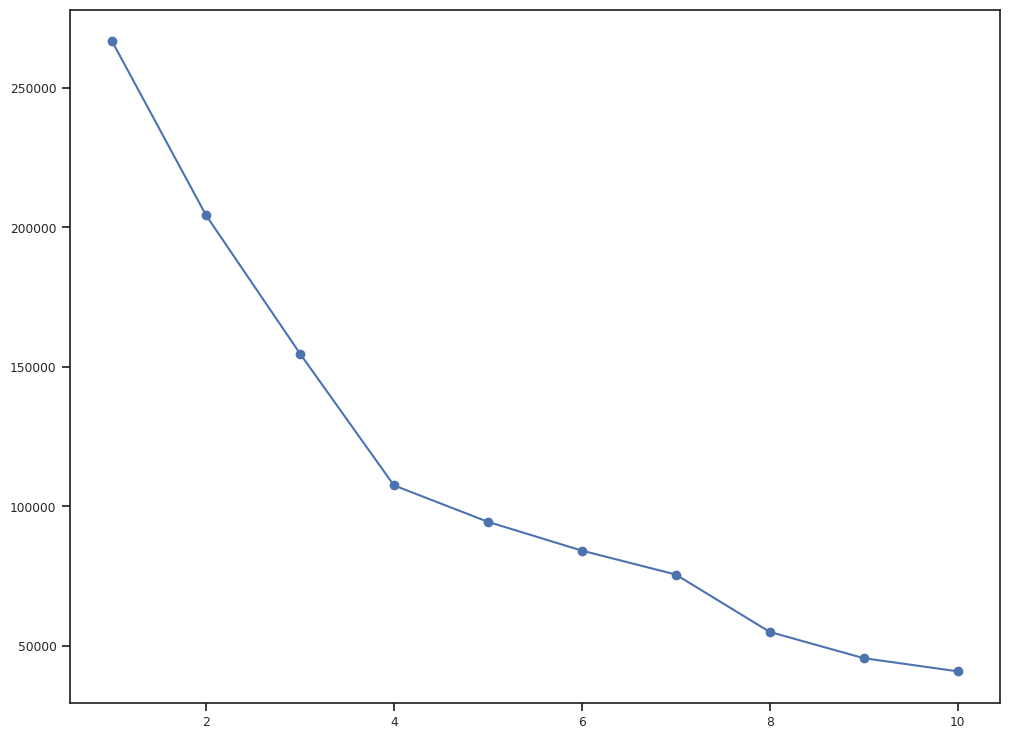

In [208]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=1)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 9))
plt.plot(range(1, 11), wcss, marker='o')
plt.show()

In [212]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',random_state = 1)
kmeans.fit(features_scaled)
df_seg_kmeans = df_rfm.copy()
df_seg_kmeans['segments'] = kmeans.labels_
df_seg_kmeans.head()

,customer_id,r_score,f_score,m_score,segments
0,00012a2ce6f8dcda20d059ce98491703,287.0,1,114.74,0
1,000161a058600d5901f007fab4c27140,409.0,1,67.41,0
2,0001fd6190edaaf884bcaf3d49edf079,547.0,1,195.42,0
3,0002414f95344307404f0ace7a26f1d5,377.0,1,179.35,1
4,000379cdec625522490c315e70c7a9fb,147.0,1,107.01,2


In [213]:
df_analysis = df_seg_kmeans.groupby('segments').agg({'r_score':'mean','f_score':'mean','m_score':'mean'})
df_analysis

,r_score,f_score,m_score
segments,,,
0,399.444037,1.043698,85.286909
1,215.694132,1.004544,218.841439
2,128.349685,1.035762,79.212714
3,278.273408,6.142322,25.124169


In [214]:
df_analysis['#observations'] = df_seg_kmeans[['segments','f_score']].groupby(['segments']).count()
df_analysis['Percentage'] = df_analysis['#observations'] / df_analysis['#observations'].sum()
df_analysis

,r_score,f_score,m_score,#observations,Percentage
segments,,,,,
0,399.444037,1.043698,85.286909,29475,0.331504
1,215.694132,1.004544,218.841439,20247,0.227717
2,128.349685,1.035762,79.212714,38924,0.437776
3,278.273408,6.142322,25.124169,267,0.003003


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


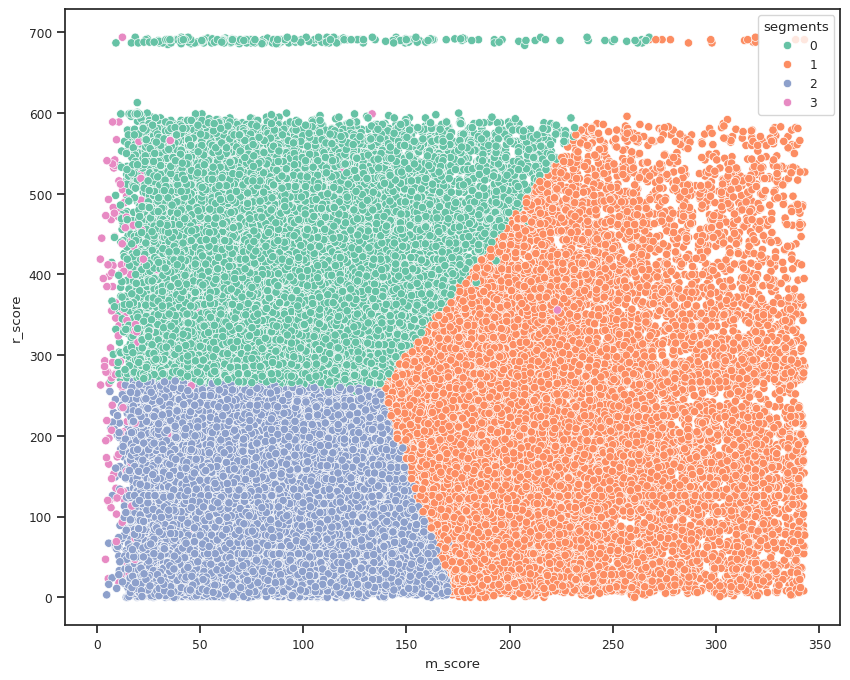

In [215]:
x_axis = df_seg_kmeans['m_score']
y_axis = df_seg_kmeans['r_score']
plt.figure(figsize = (10,8))
sns.scatterplot(x = x_axis, y = y_axis, hue = df_seg_kmeans['segments'],
                palette = 'Set2', legend = 'full')
plt.show()

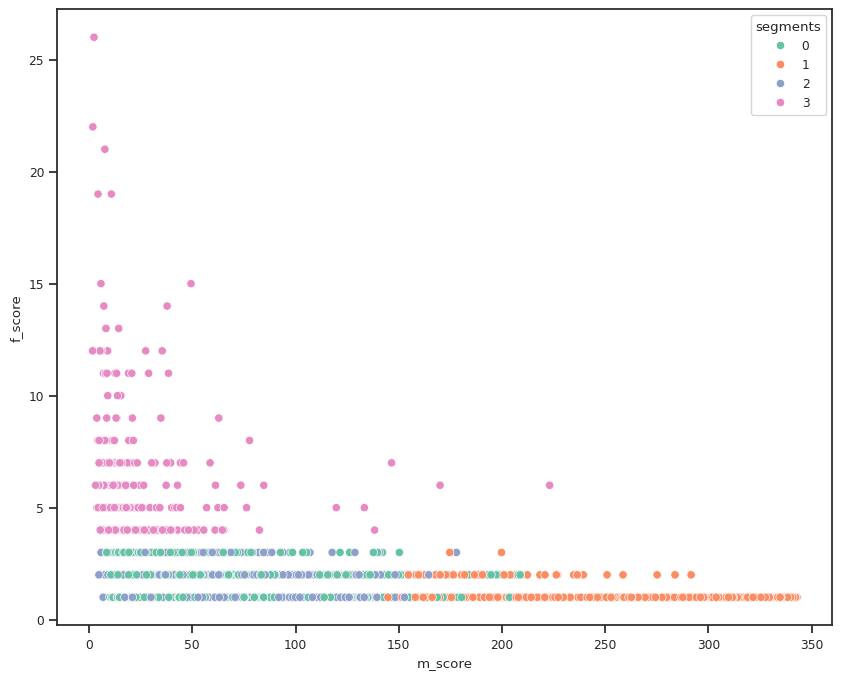

In [216]:
x_axis = df_seg_kmeans['m_score']
y_axis = df_seg_kmeans['f_score']
plt.figure(figsize = (10,8))
sns.scatterplot(x = x_axis, y = y_axis, hue = df_seg_kmeans['segments'],
                palette = 'Set2', legend = 'full')
plt.show()

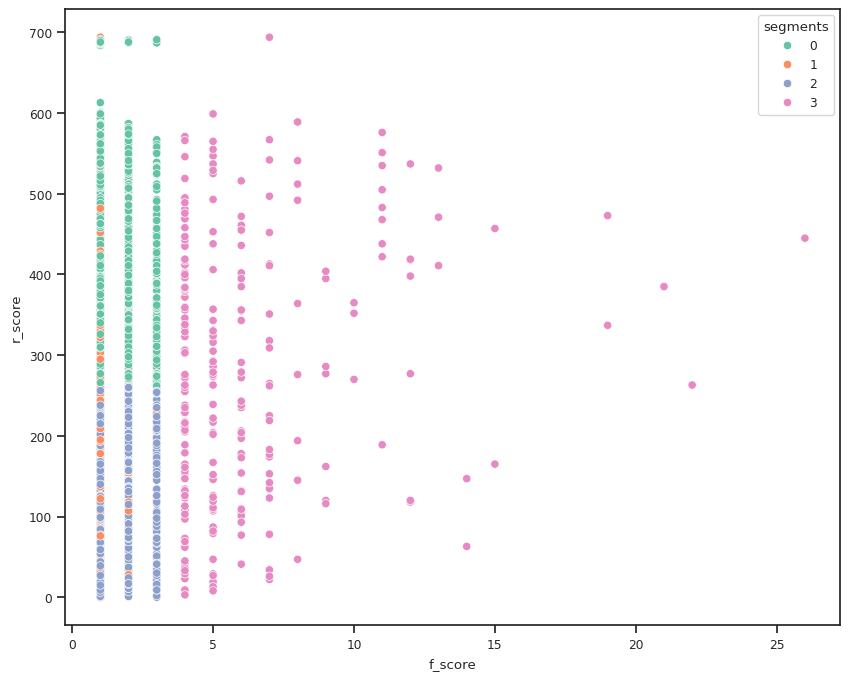

In [217]:
x_axis = df_seg_kmeans['f_score']
y_axis = df_seg_kmeans['r_score']
plt.figure(figsize = (10,8))
sns.scatterplot(x = x_axis, y = y_axis, hue = df_seg_kmeans['segments'],
                palette = 'Set2', legend = 'full')
plt.show()

In [218]:
df_analysis

,r_score,f_score,m_score,#observations,Percentage
segments,,,,,
0,399.444037,1.043698,85.286909,29475,0.331504
1,215.694132,1.004544,218.841439,20247,0.227717
2,128.349685,1.035762,79.212714,38924,0.437776
3,278.273408,6.142322,25.124169,267,0.003003


## Insights and interpreations ##

This segementation show us 4 kinds of customers. Using these information is key to understand the situtation and do the following reccomandeation system.

* __Frist group (segment 0):__ Customer hith high monetary
scores (m), here we see from people with high and low shopping frequency.
-------------------------------------------------------

* __Second group (segment 1):__ Customer who had recent purchases.

------------------------------------------------------

* __Third group (segment 2):__ Customers who have been without shopping for a long time, also low expenders.

------------------------------------------------------

* __Fourth group (segment 3):__ Customers who have made various transactions. Not very important as th represent less than 1% of the people.